In [1]:
import pandas as pd
import numpy as np

def loader():
    """Reading data from keys"""
    with open("data/keys.txt", "r") as f:
        keys = eval(f.read())

    dictex = {}    
    for key in keys:
        dictex[key] = pd.read_csv("data/data_{}.csv".format(str(key)))

    return dictex

In [2]:
df = loader()

In [3]:
# from horizon_handler
HORIZON_FEATURES = ['radiation', 'shade']

# from SMHI
FCST_FEATURES = ['AirTemp', 'DewPoint', 'RainPrecip', 'SnowPrecip', 'SnowPrecipAccumulated', 'WindSpeed',
                 'AirPressure', 'OctalCloudCoverage', 'PrecipAmount']
# from METRo
EBM_FEATURES = ['air_temp', 'dew_point', 'surf_temp', 'water_amount', 'snow_amount', 'sub_temp']


# setting the independent and dependent features
INDEPENDENT_FEATURES = HORIZON_FEATURES + FCST_FEATURES + EBM_FEATURES

In [4]:
# Random Forest parameters
RFR_PARAMS = {
    'n_estimators': 60,
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'max_depth': 8}

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

def fit_forest(samples, targets, params=RFR_PARAMS):
    model = RandomForestRegressor(**params).fit(samples, targets)
    return model

def forecast_forest(model, samples):
    predictions = model.predict(samples)
    return predictions

def getValues(data):
    data.set_index("Date Time", inplace=True)
    included = np.array(data[INDEPENDENT_FEATURES + ['surf_temp_sqerror']].notnull().all(axis=1))
    rsi = {
        "data": data.loc[included, INDEPENDENT_FEATURES].values.astype(np.float), 
        "target": data.loc[included, 'surf_temp_sqerror'].values.astype(np.float)
    }
    return train_test_split(rsi["data"], rsi["target"], test_size=0.3, random_state=0)


In [6]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

def plotPredictions(key, true, predictions):
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    pyplot.scatter(true, predictions, color="red", alpha=0.5, s=10)
    pyplot.xlim(0,20)
    pyplot.ylim(0,20)
    pyplot.plot(range(60), color='black', alpha=0.2)
    pyplot.grid()
    pyplot.title(key, fontsize=16)
    pyplot.xlabel('surf_temp_sqerror')
    pyplot.ylabel('Estimated surf_temp_sqerror')

In [7]:
def experiment(repeats, data, key):
    X_train, X_test, y_train, y_test = getValues(data)

    error_scores = list()
    results = pd.DataFrame()
    for r in range(repeats):
        forest_model = fit_forest(X_train, y_train)

        predictions = forecast_forest(forest_model, X_test)
        true = y_test
    
        # report performance
        mse = mean_squared_error(true, predictions)
        print('%d) Test MSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
        plotPredictions(key, true, predictions)
    for name, value in zip(INDEPENDENT_FEATURES, forest_model.feature_importances_):
        print('{}: {}'.format(name, value*100))
    return error_scores

1) Test MSE: 0.454
2) Test MSE: 0.450
3) Test MSE: 0.448
4) Test MSE: 0.456
5) Test MSE: 0.455
6) Test MSE: 0.447
7) Test MSE: 0.447
8) Test MSE: 0.443
9) Test MSE: 0.445
10) Test MSE: 0.450
radiation: 31.273047388369264
shade: 5.357556004240786
AirTemp: 6.84581252425394
DewPoint: 6.876115418431596
RainPrecip: 0.22592710157090323
SnowPrecip: 8.499459425920645e-06
SnowPrecipAccumulated: 0.0032394550067066474
WindSpeed: 6.649003219037884
AirPressure: 5.356676085289631
OctalCloudCoverage: 7.018516308951714
PrecipAmount: 0.2462301237699029
air_temp: 6.46482245024088
dew_point: 5.3056928602925675
surf_temp: 8.006391783215754
water_amount: 3.777744694042419
snow_amount: 0.19755329537231212
sub_temp: 6.395662788454318
1) Test MSE: 10.293
2) Test MSE: 10.476
3) Test MSE: 10.299
4) Test MSE: 10.410
5) Test MSE: 10.479
6) Test MSE: 10.367
7) Test MSE: 10.319
8) Test MSE: 10.277
9) Test MSE: 10.094
10) Test MSE: 10.450
radiation: 20.206133736079238
shade: 8.224278557067704
AirTemp: 7.991681088536

2) Test MSE: 0.831
3) Test MSE: 0.836
4) Test MSE: 0.834
5) Test MSE: 0.841
6) Test MSE: 0.842
7) Test MSE: 0.843
8) Test MSE: 0.836
9) Test MSE: 0.833
10) Test MSE: 0.840
radiation: 20.18243812903731
shade: 4.8761795978124365
AirTemp: 6.778858877730235
DewPoint: 7.856798990750906
RainPrecip: 0.08732859249260196
SnowPrecip: 0.008681963577481886
SnowPrecipAccumulated: 0.0036320052148527565
WindSpeed: 6.4391264556417065
AirPressure: 6.5442453763339525
OctalCloudCoverage: 5.331463003800133
PrecipAmount: 0.14204194298372352
air_temp: 7.215714381526149
dew_point: 9.90729345537713
surf_temp: 10.401806507226873
water_amount: 4.843520029580751
snow_amount: 0.35109814865234995
sub_temp: 9.029772542261405
1) Test MSE: 5.594
2) Test MSE: 5.506
3) Test MSE: 5.683
4) Test MSE: 5.668
5) Test MSE: 5.687
6) Test MSE: 5.635
7) Test MSE: 5.602
8) Test MSE: 5.636
9) Test MSE: 5.658
10) Test MSE: 5.552
radiation: 32.1862720382507
shade: 7.142447423182838
AirTemp: 3.674134921569092
DewPoint: 4.985821363064

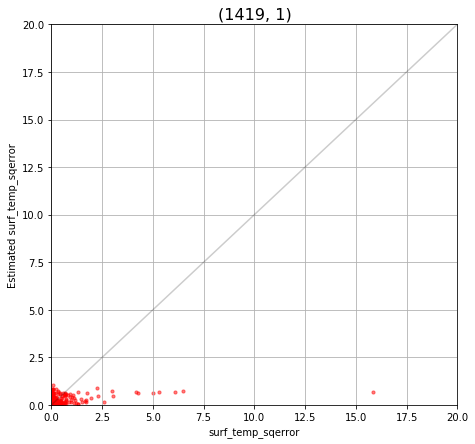

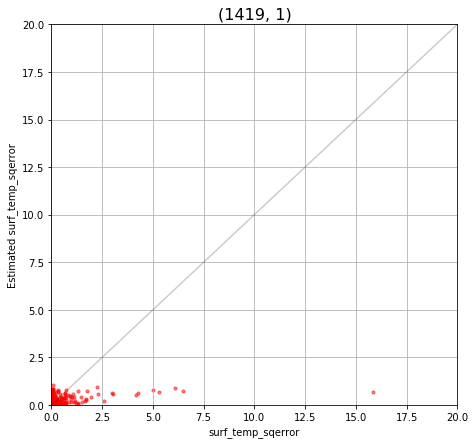

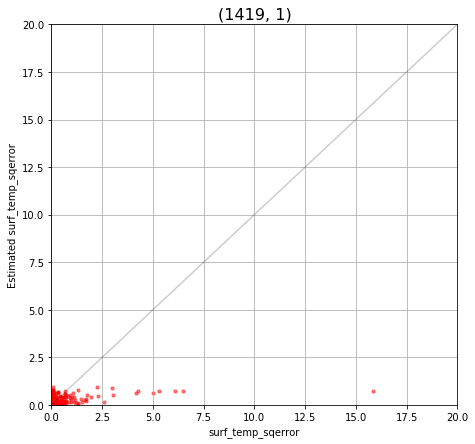

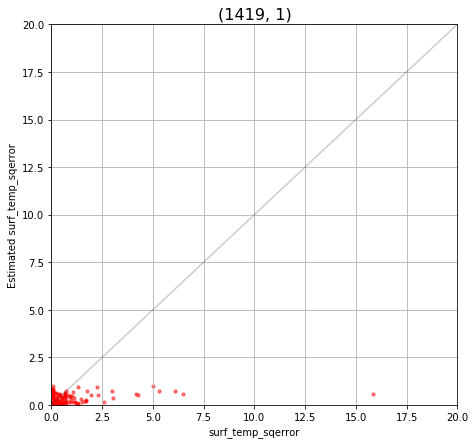

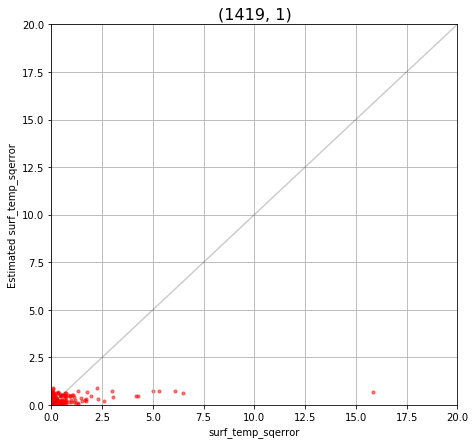

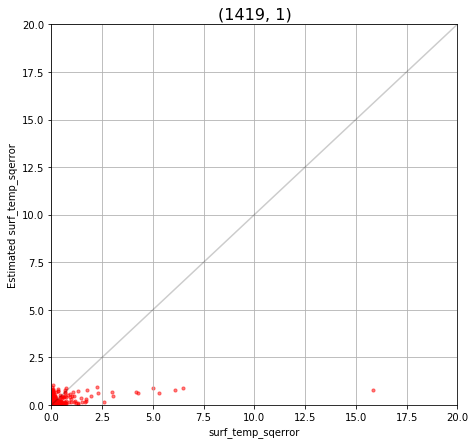

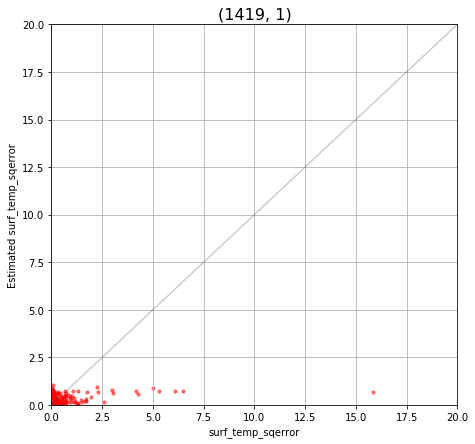

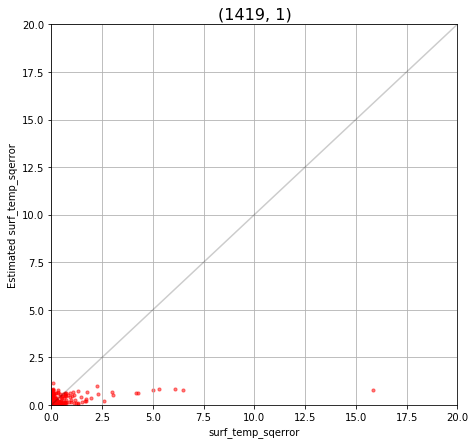

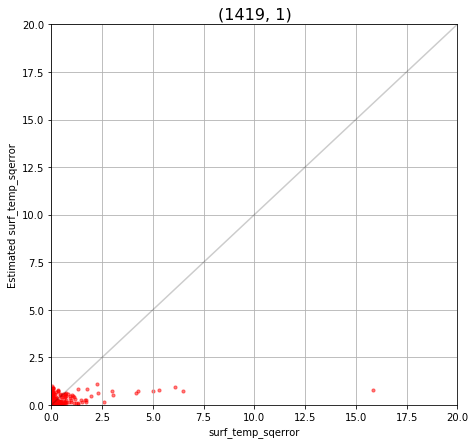

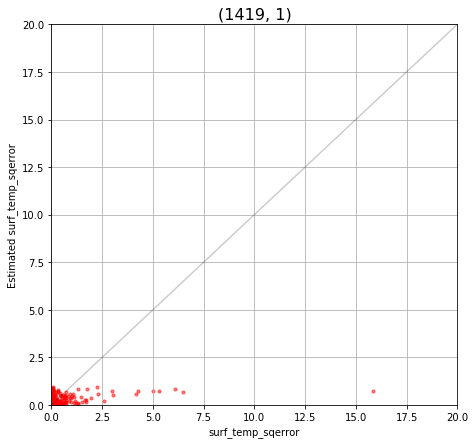

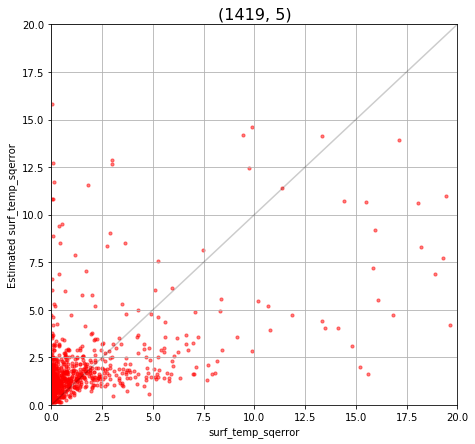

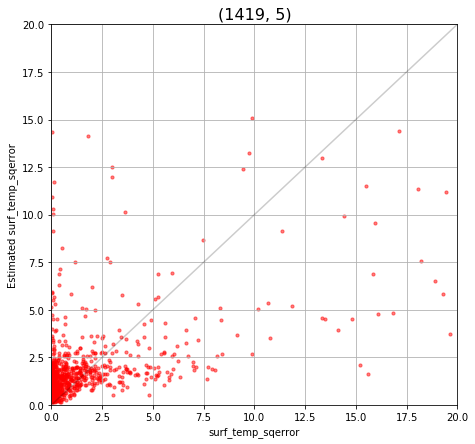

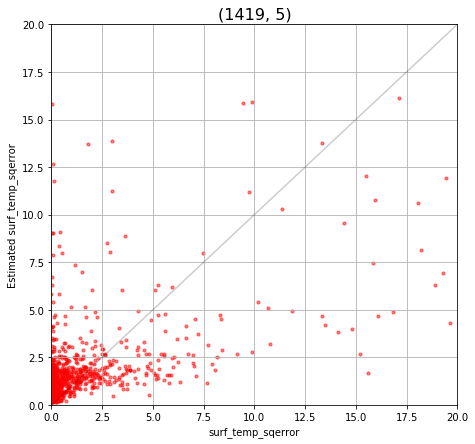

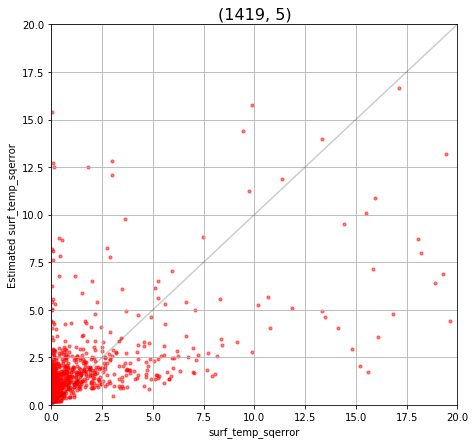

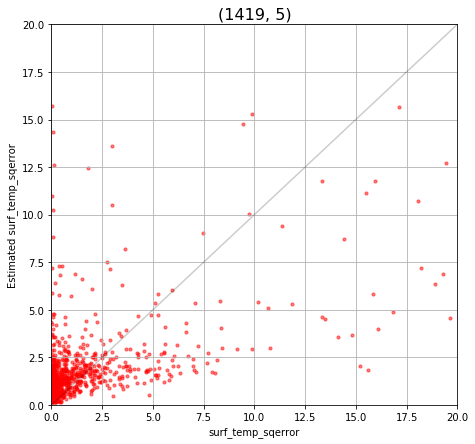

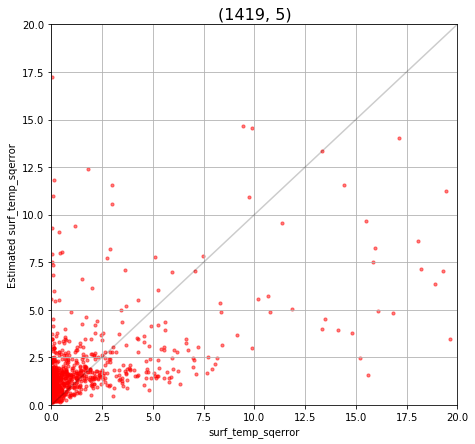

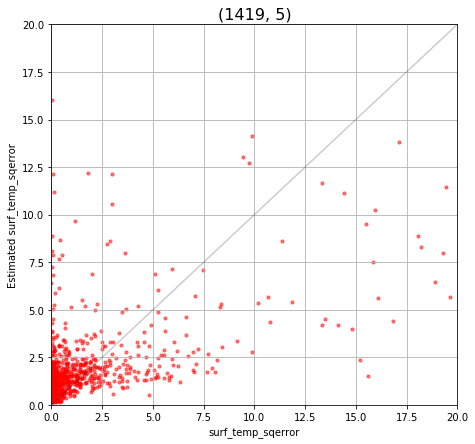

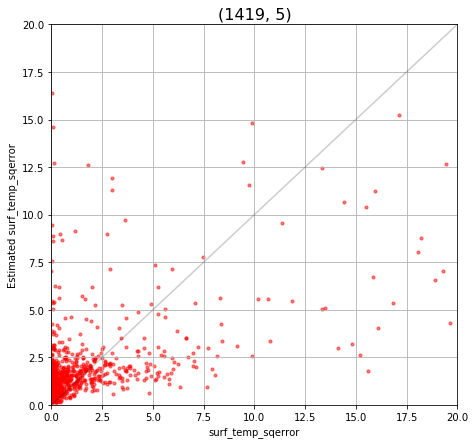

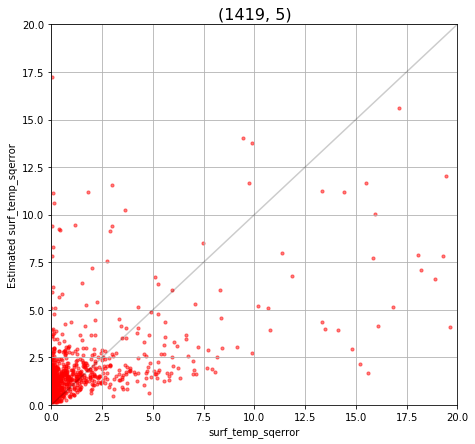

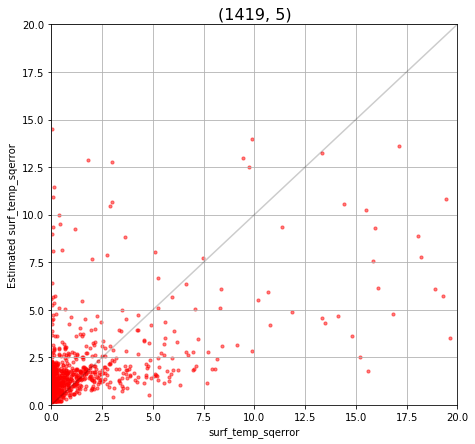

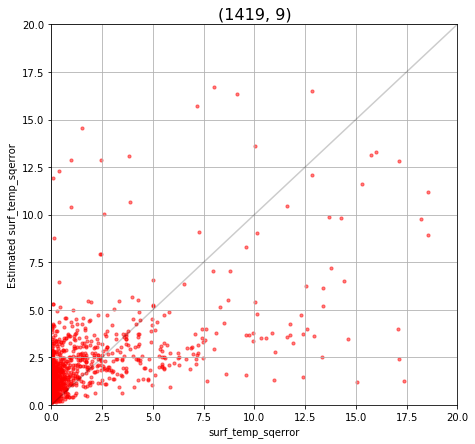

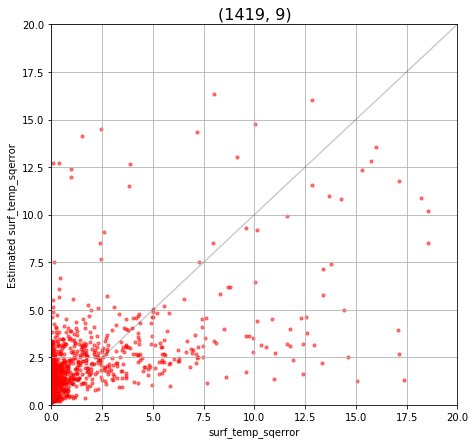

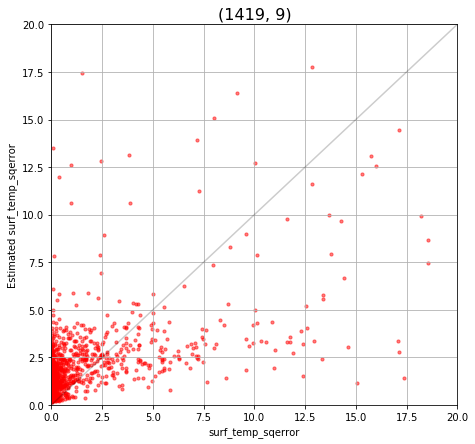

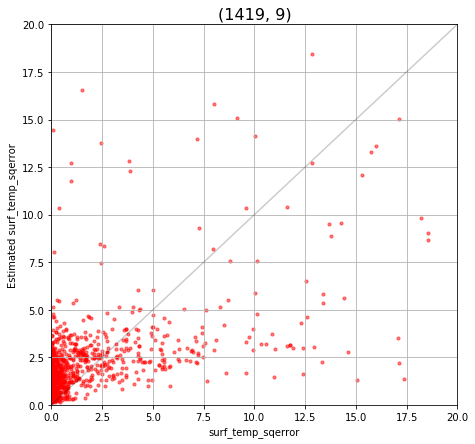

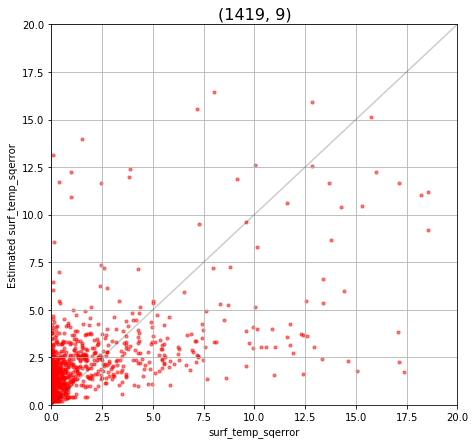

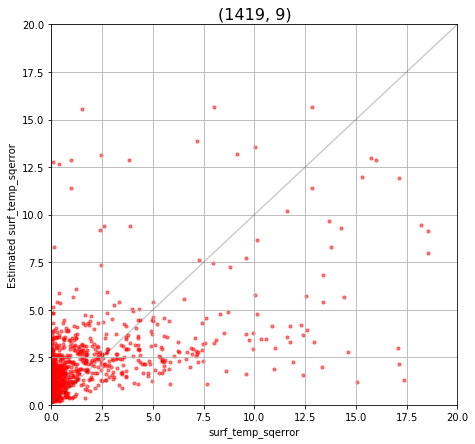

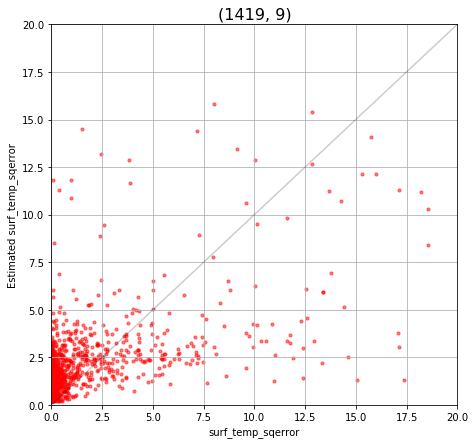

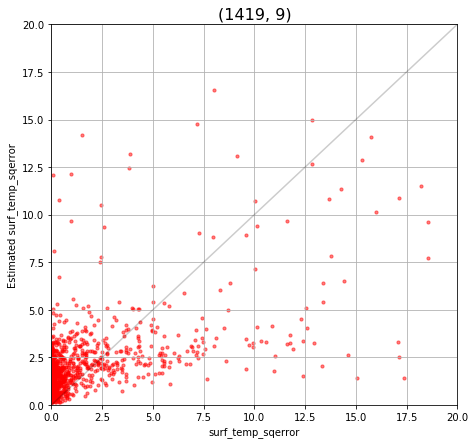

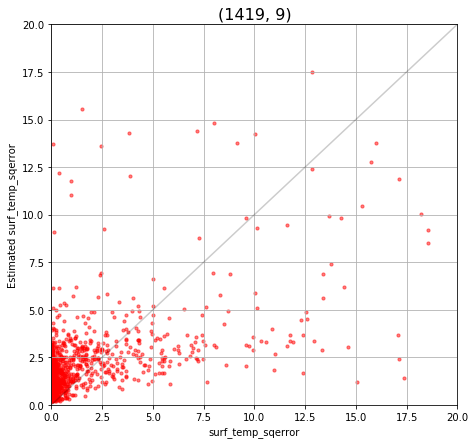

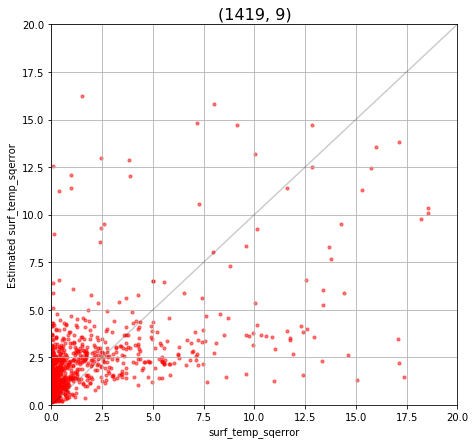

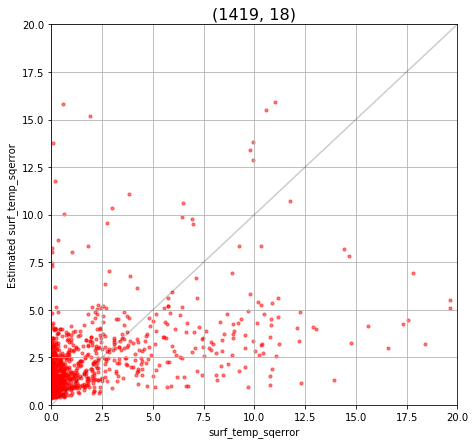

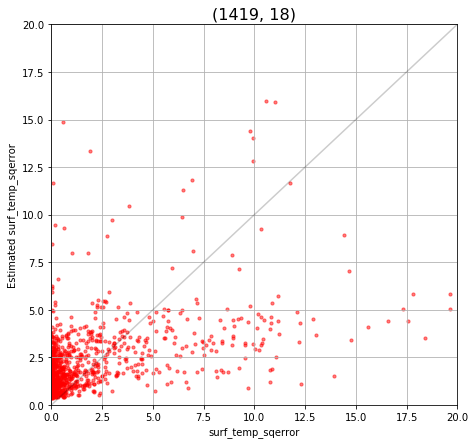

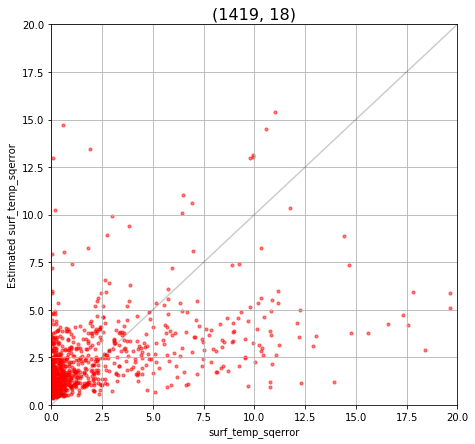

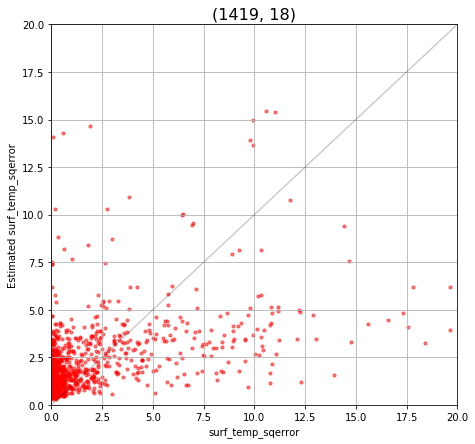

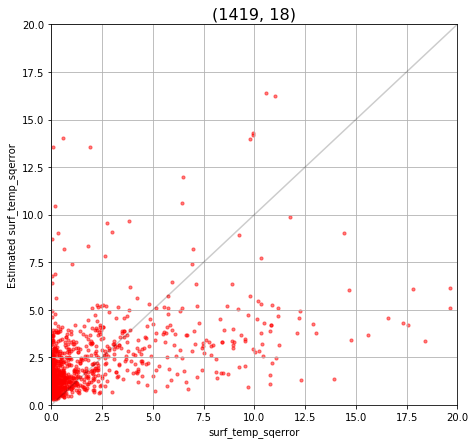

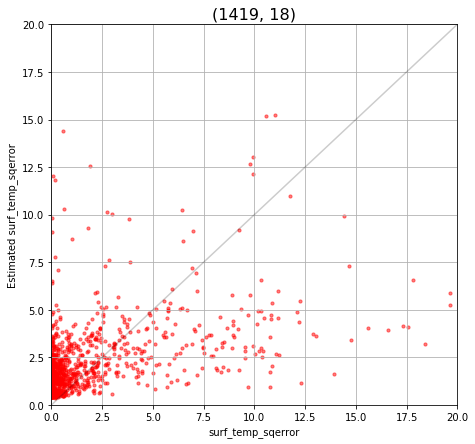

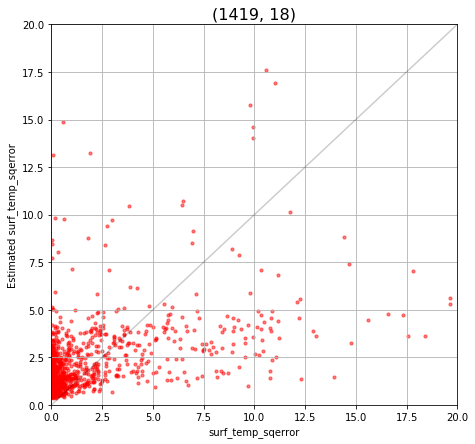

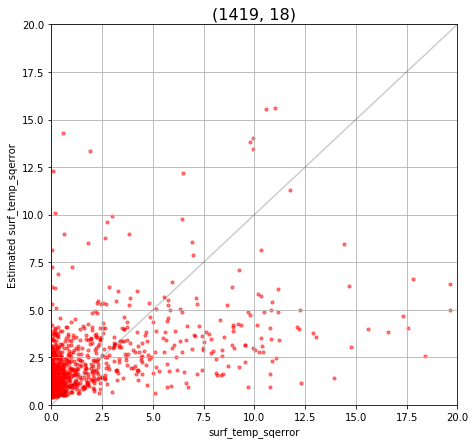

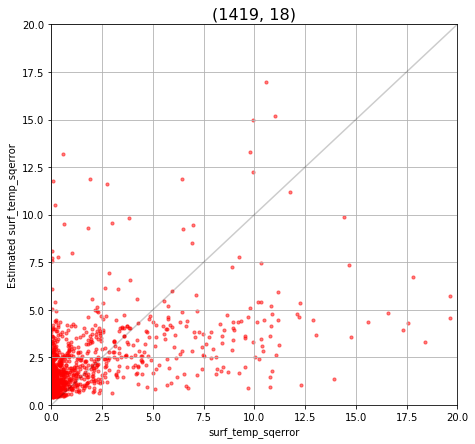

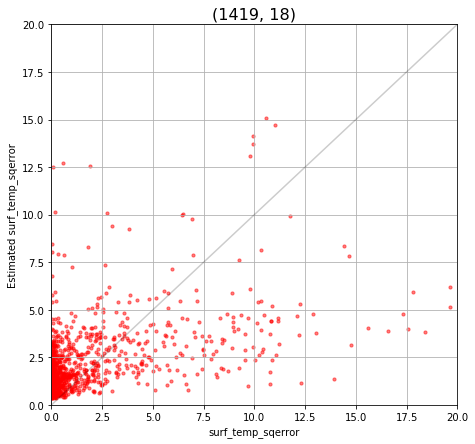

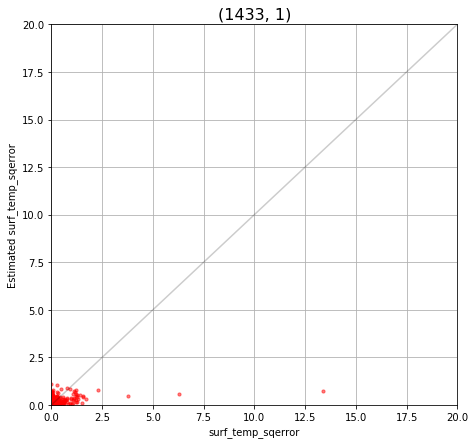

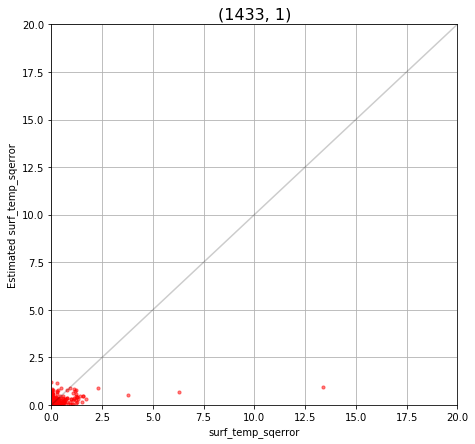

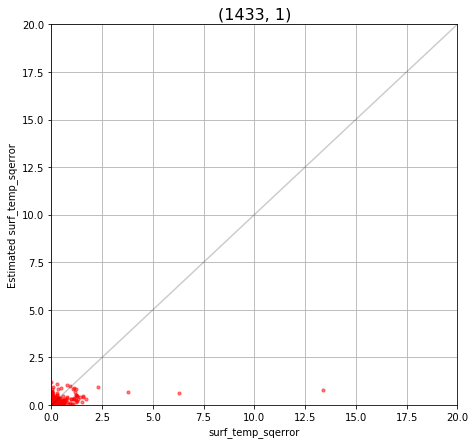

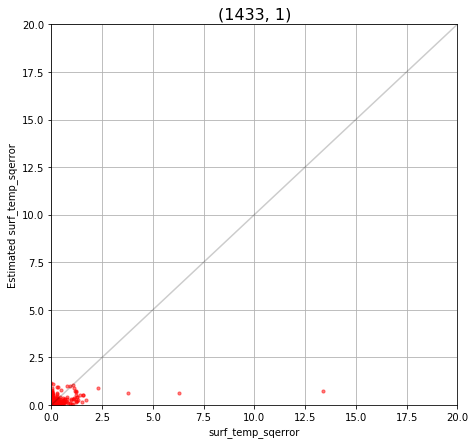

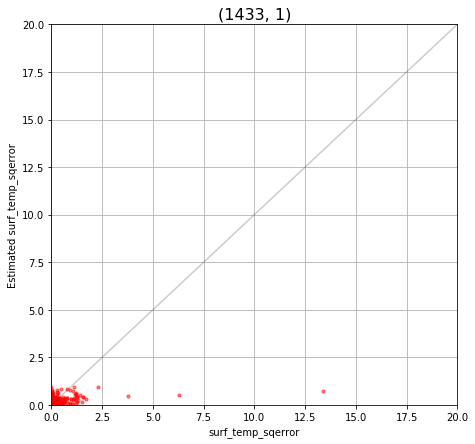

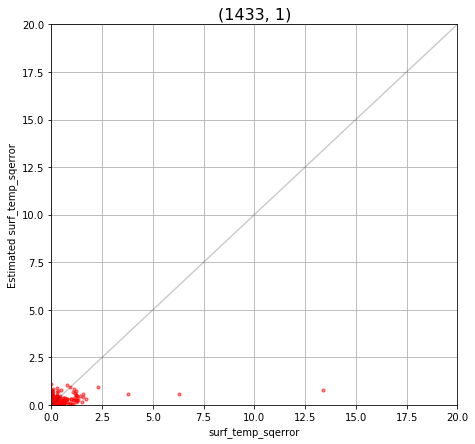

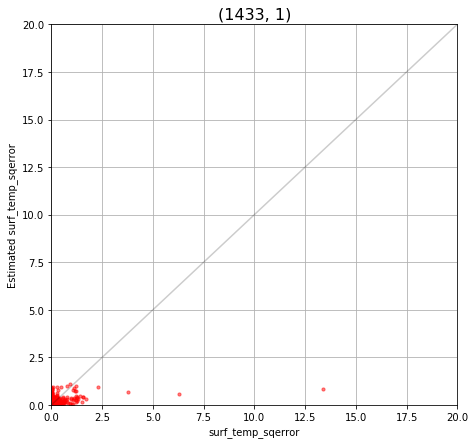

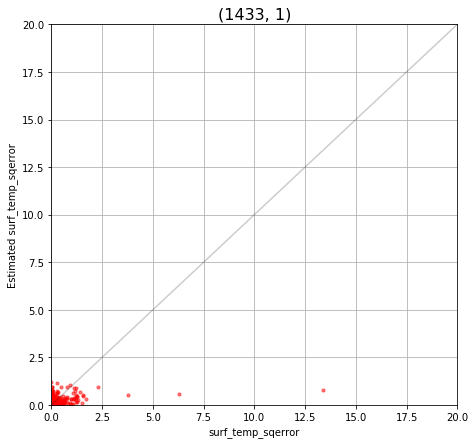

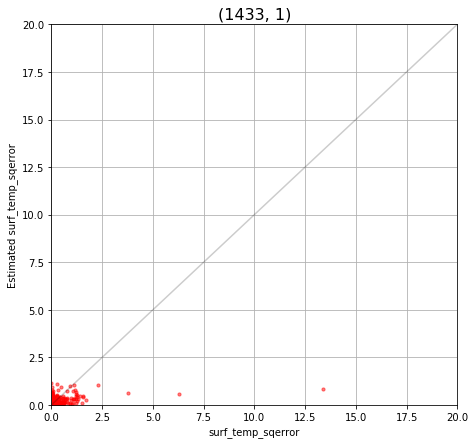

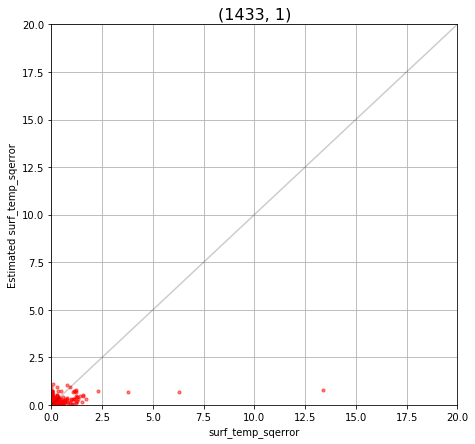

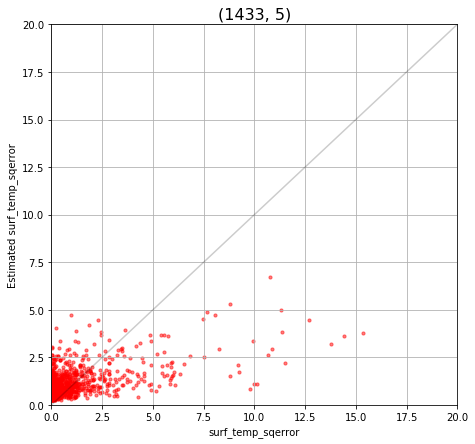

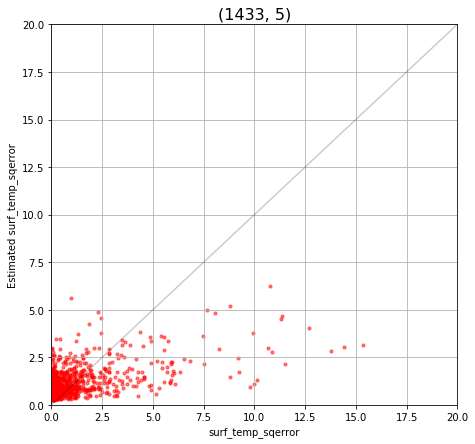

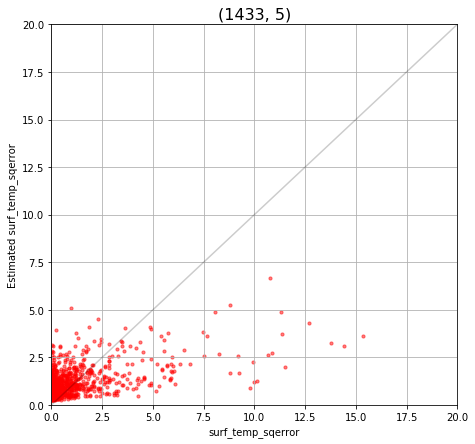

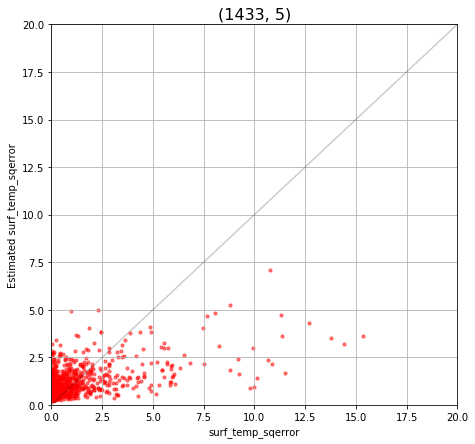

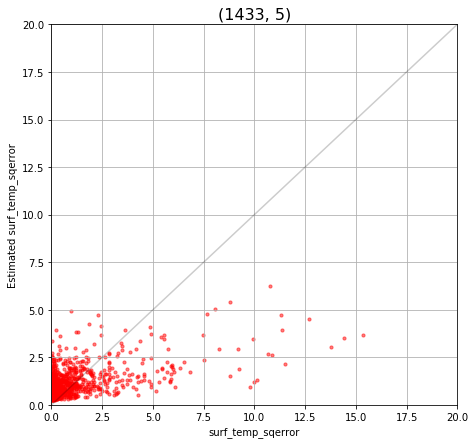

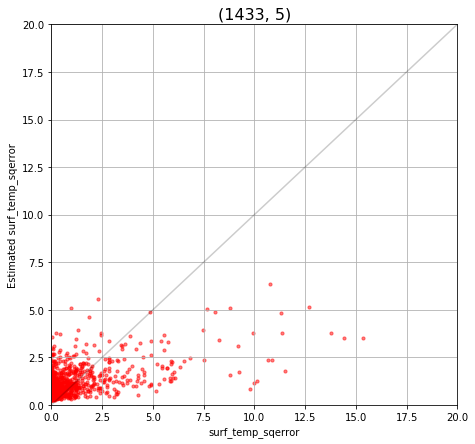

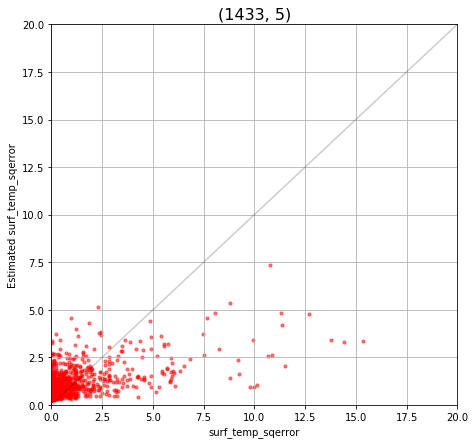

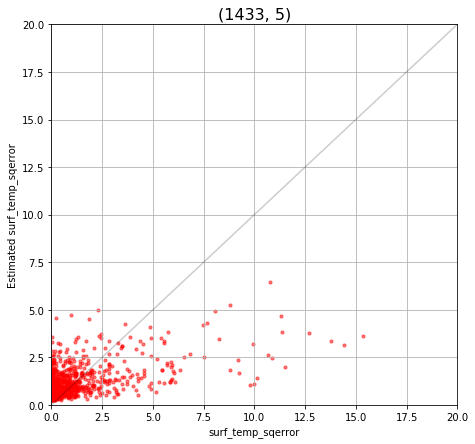

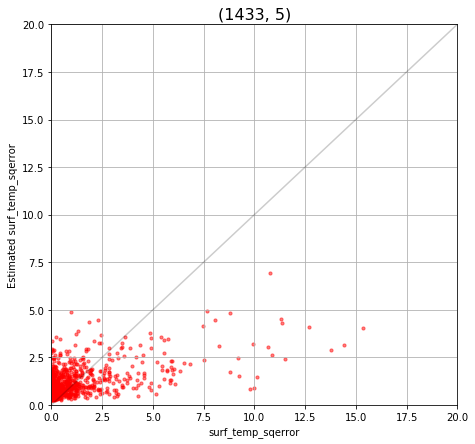

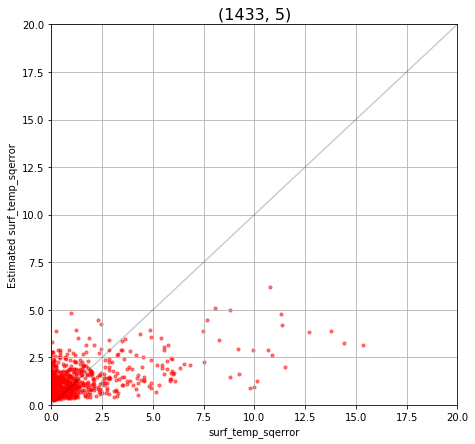

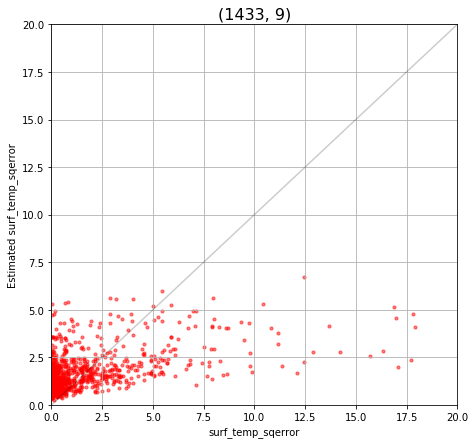

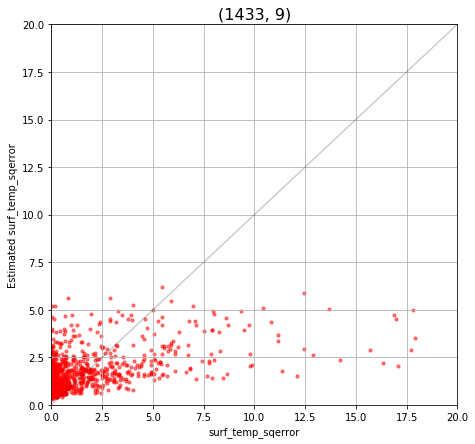

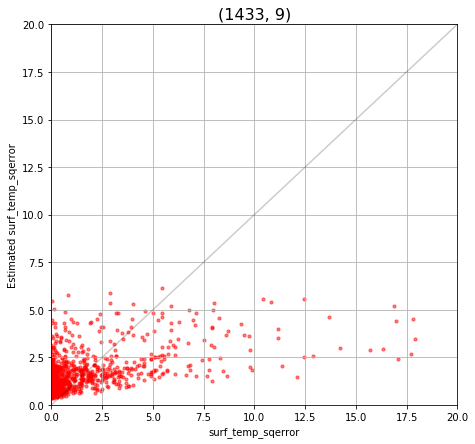

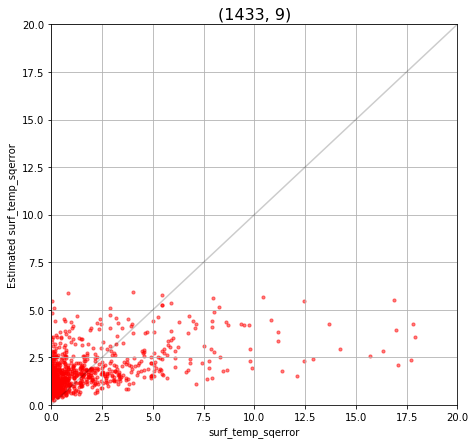

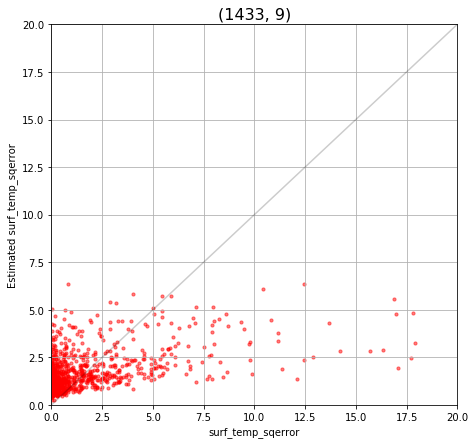

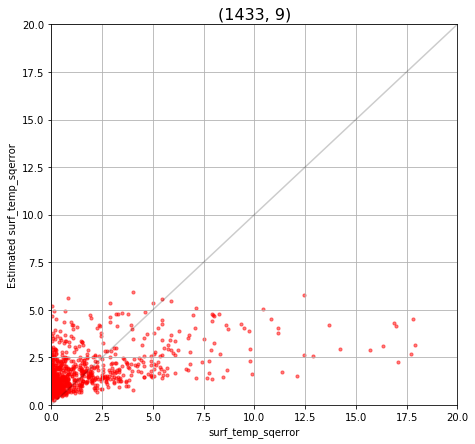

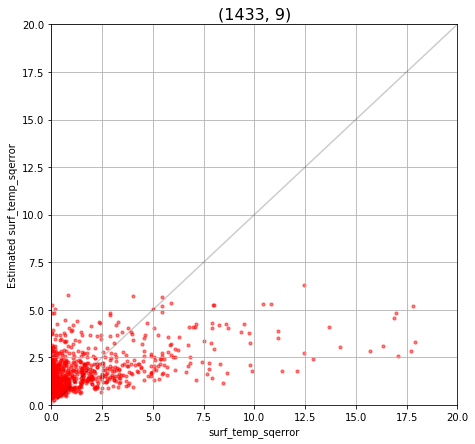

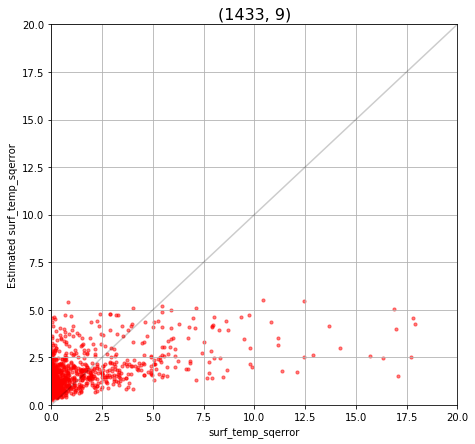

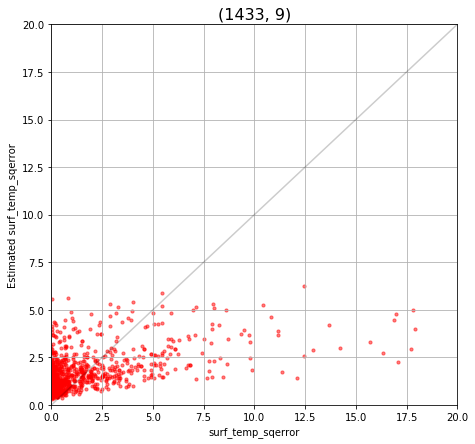

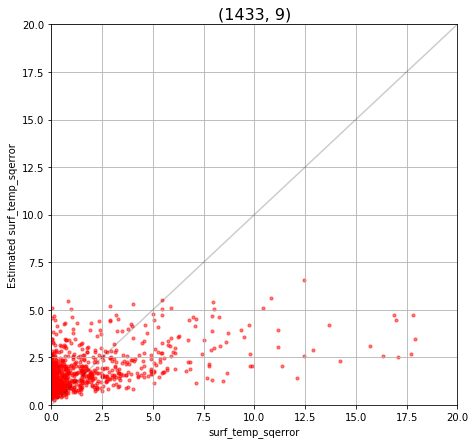

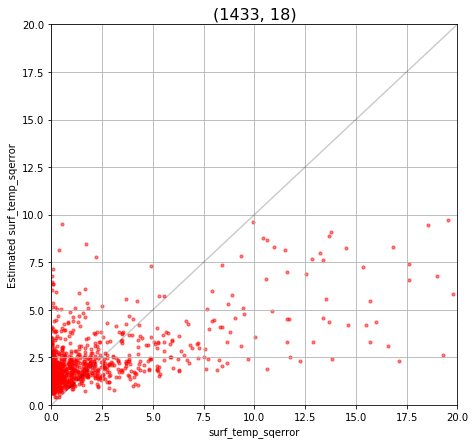

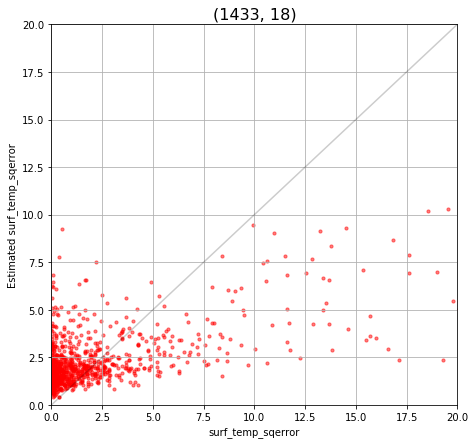

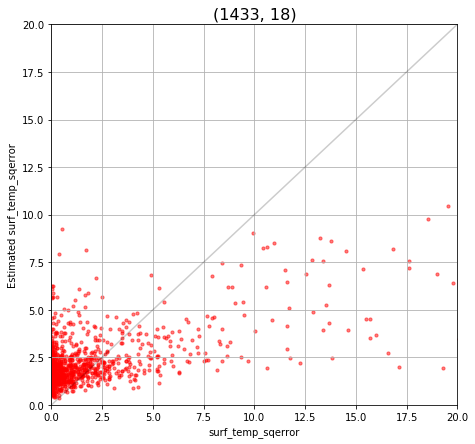

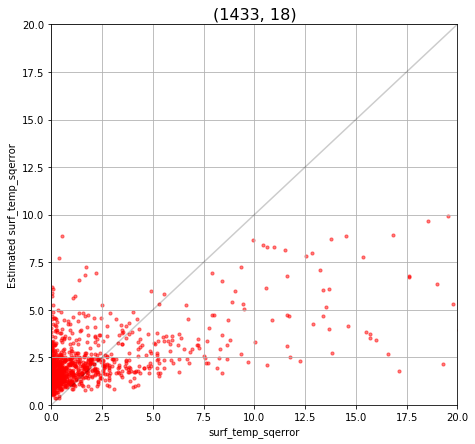

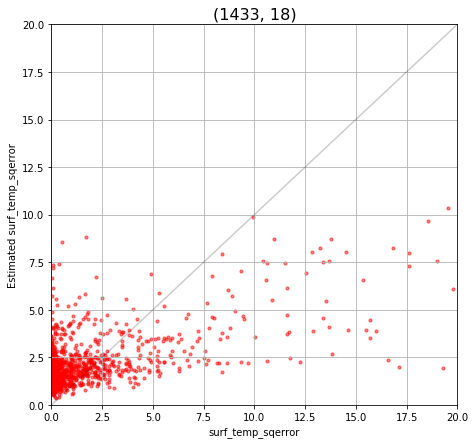

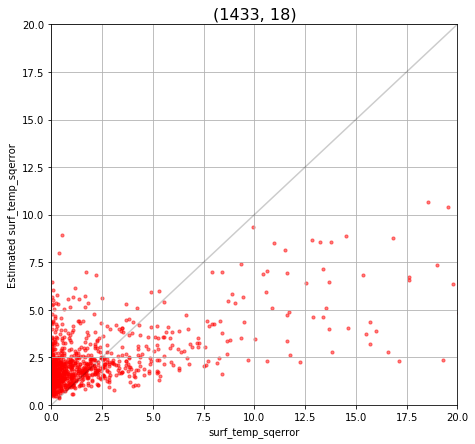

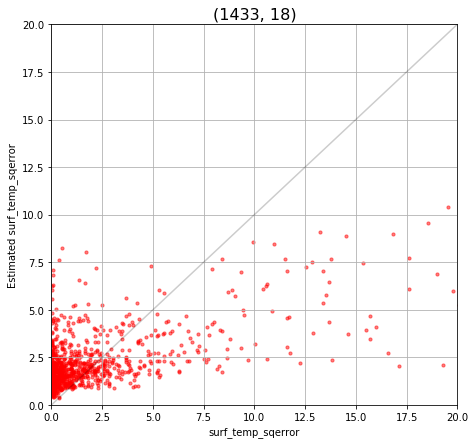

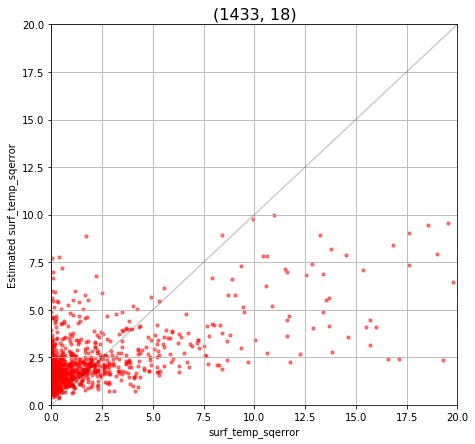

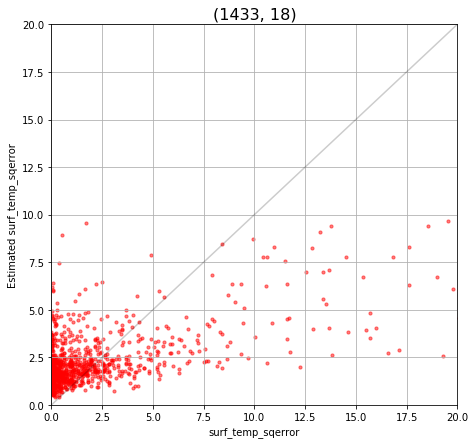

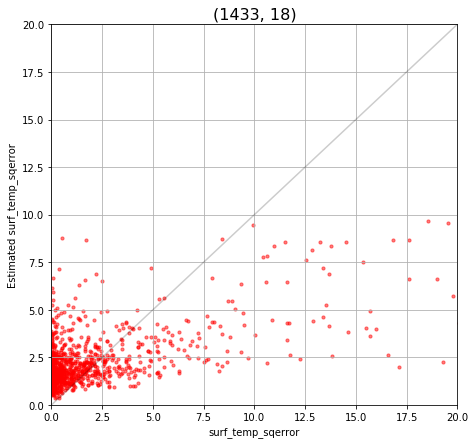

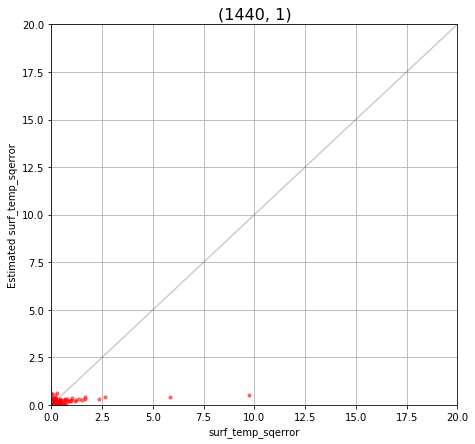

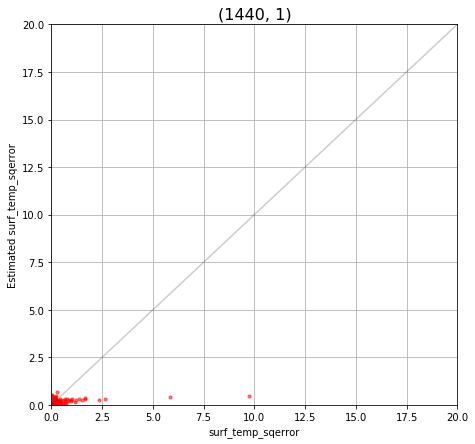

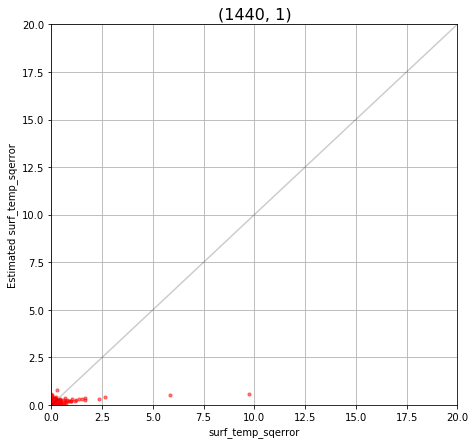

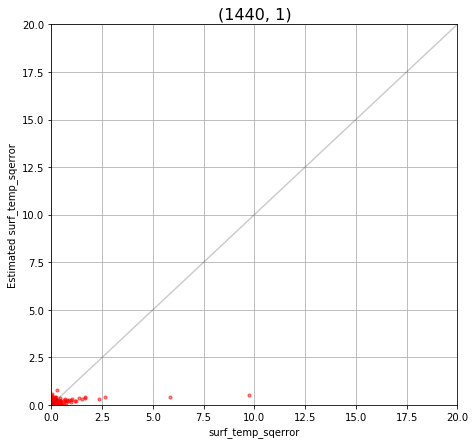

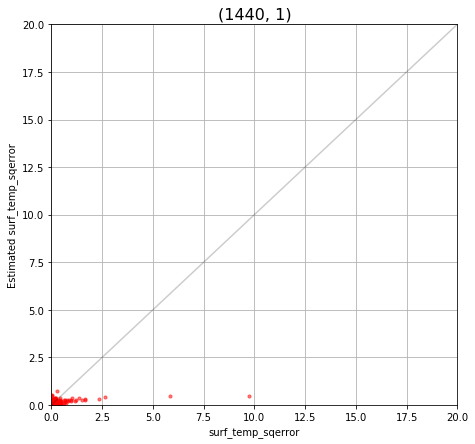

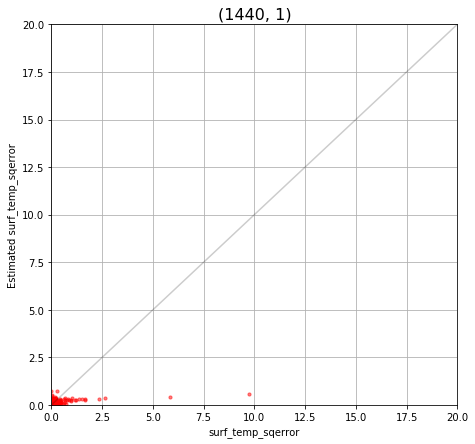

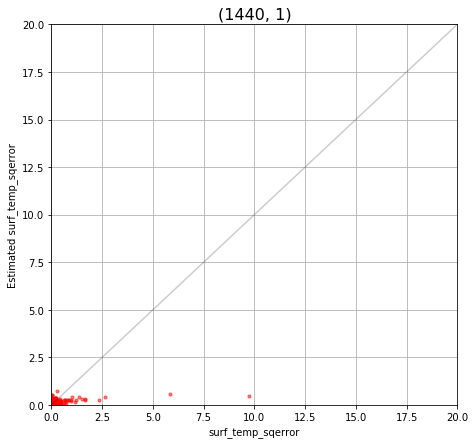

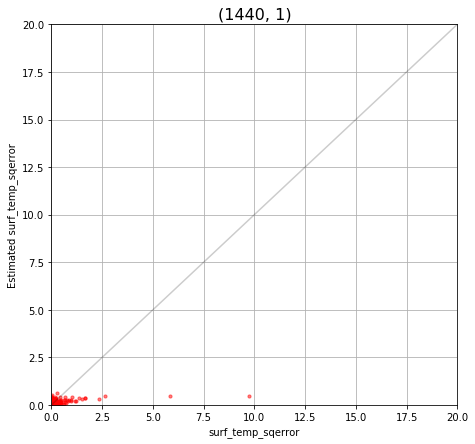

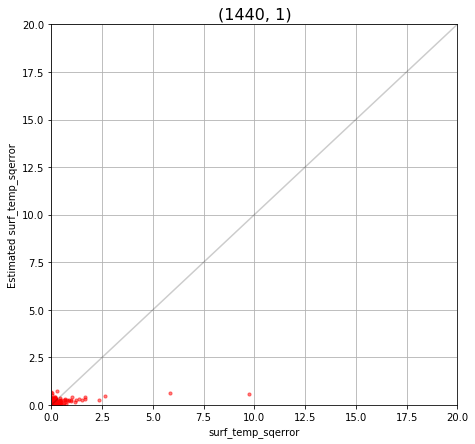

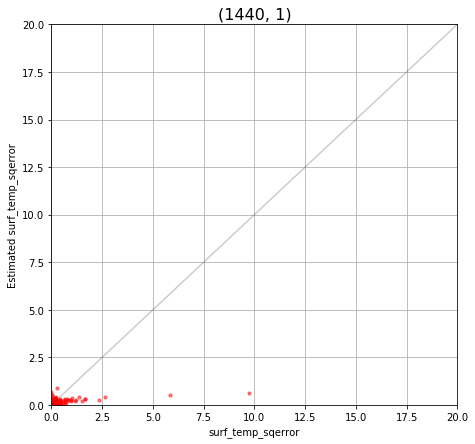

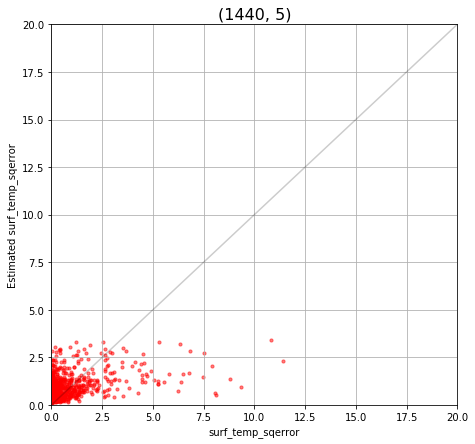

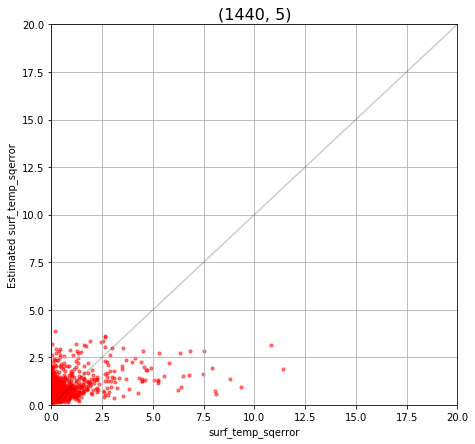

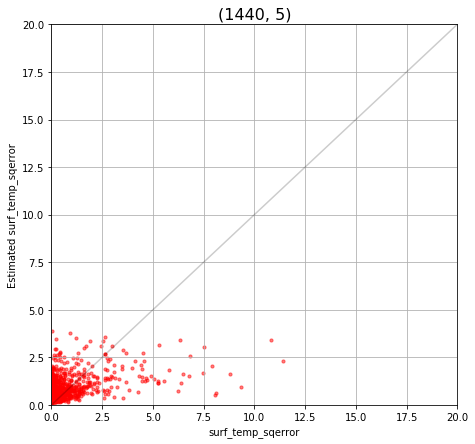

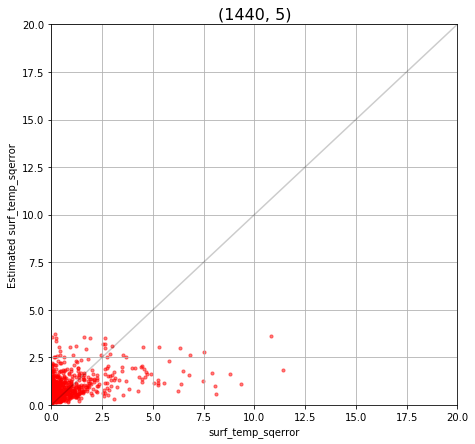

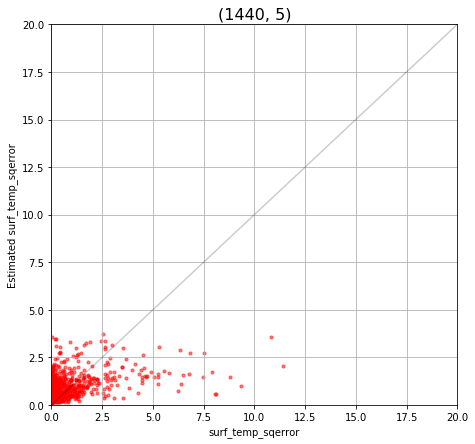

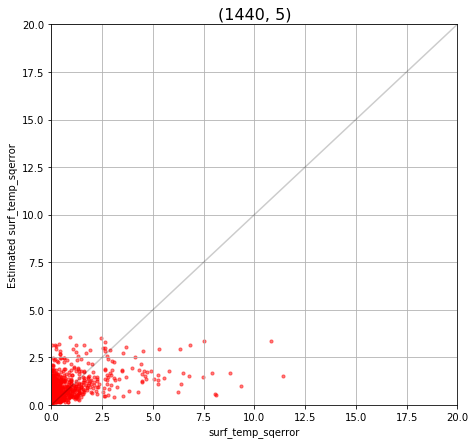

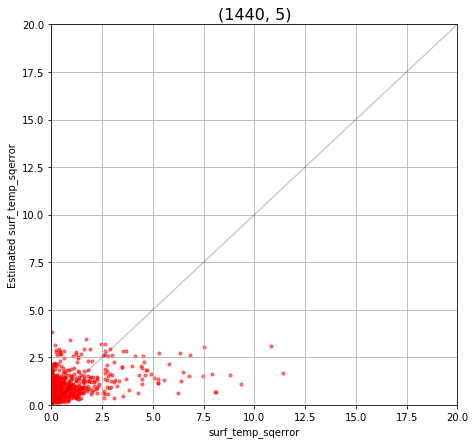

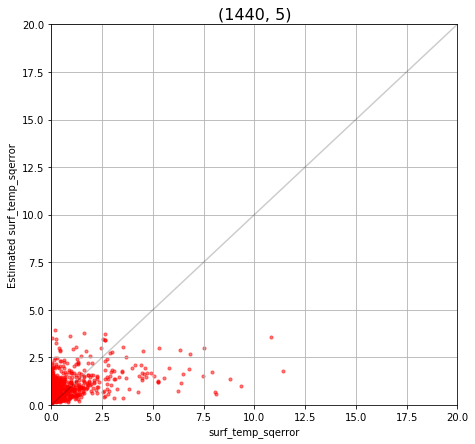

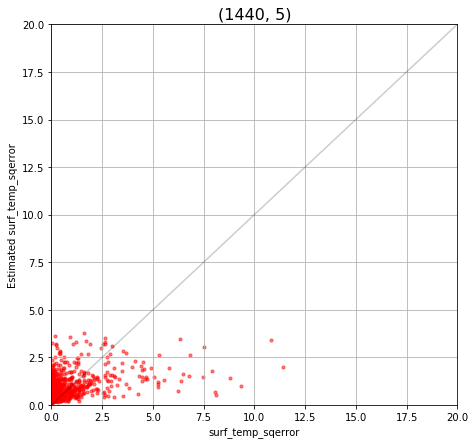

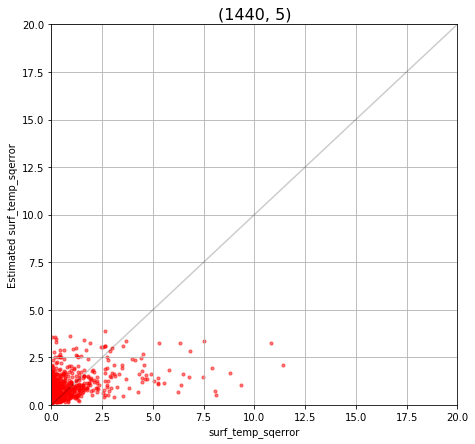

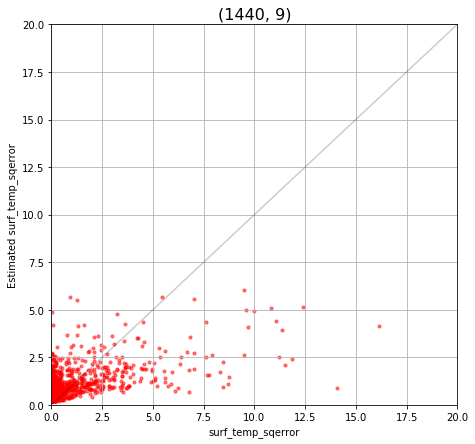

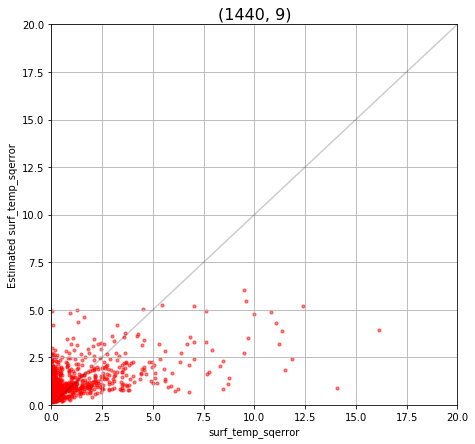

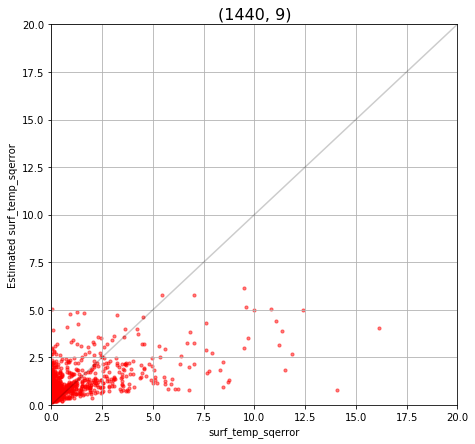

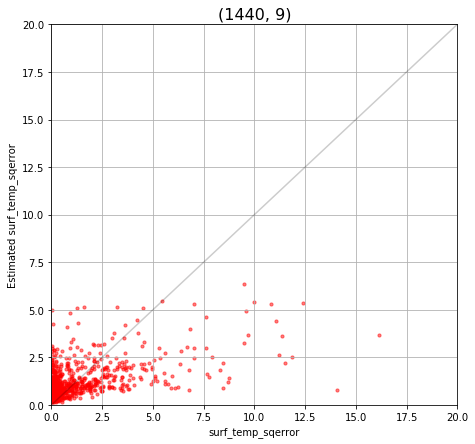

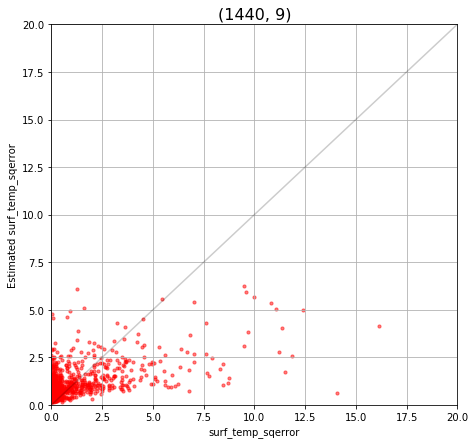

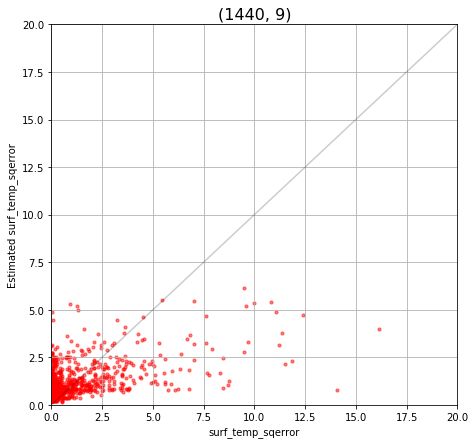

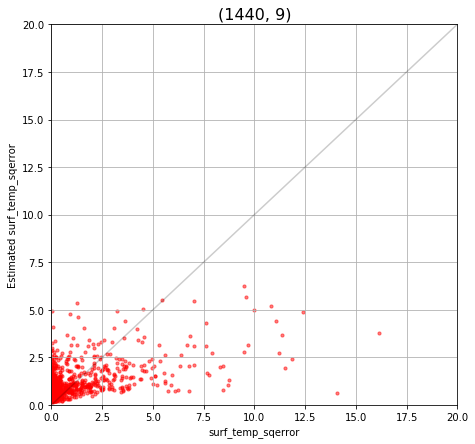

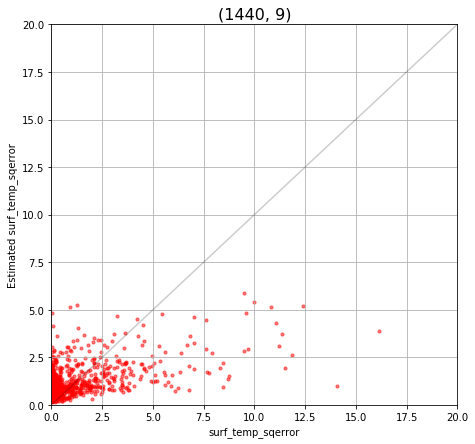

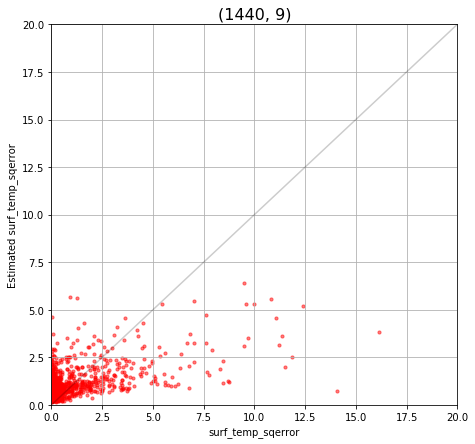

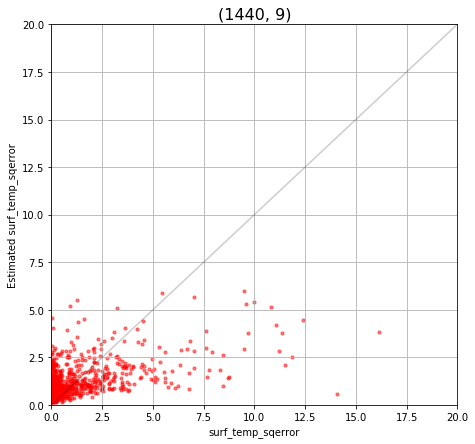

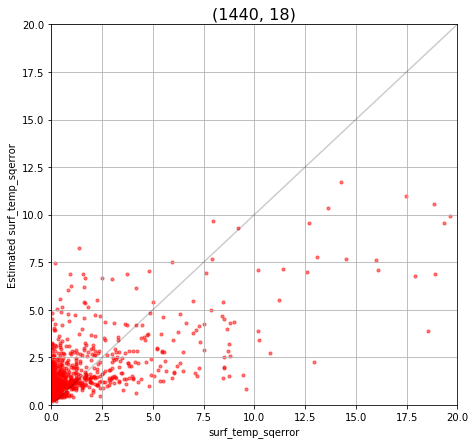

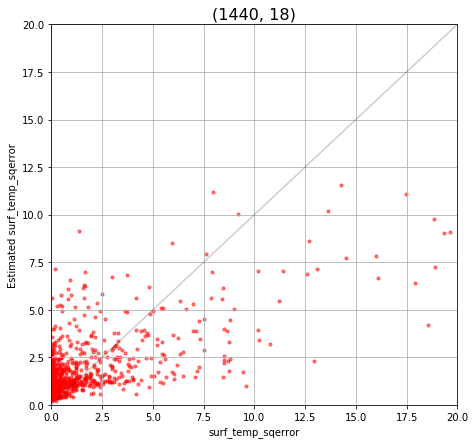

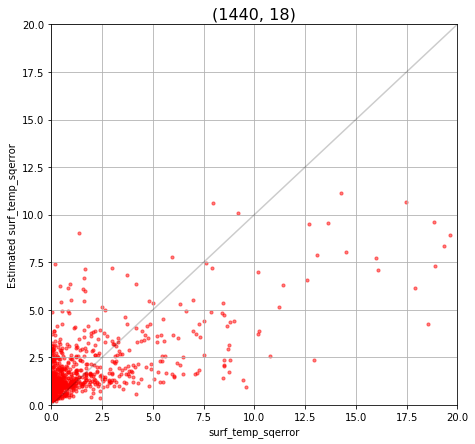

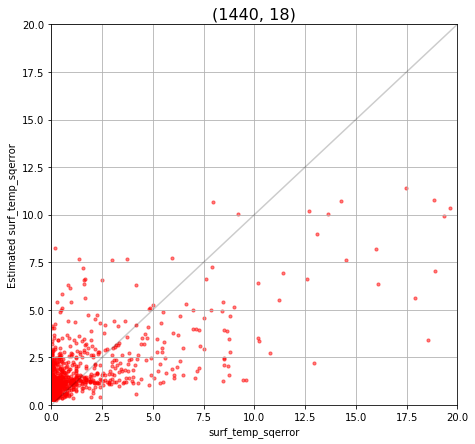

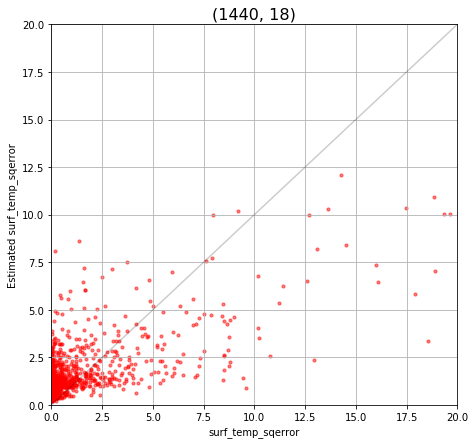

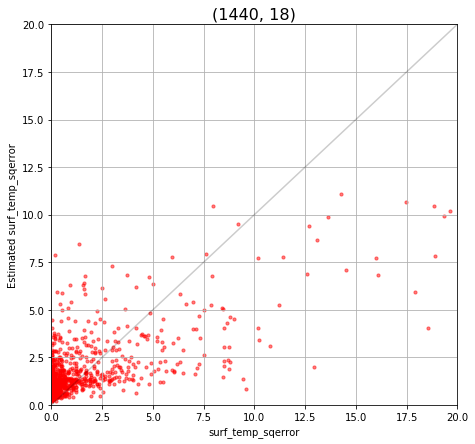

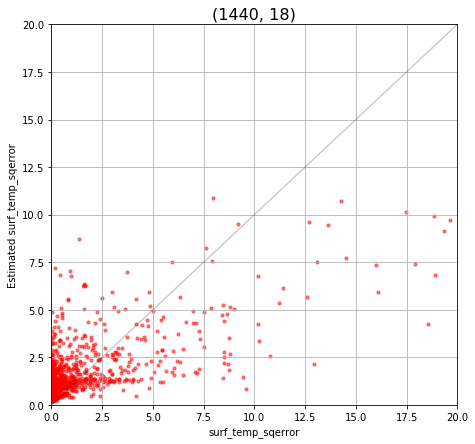

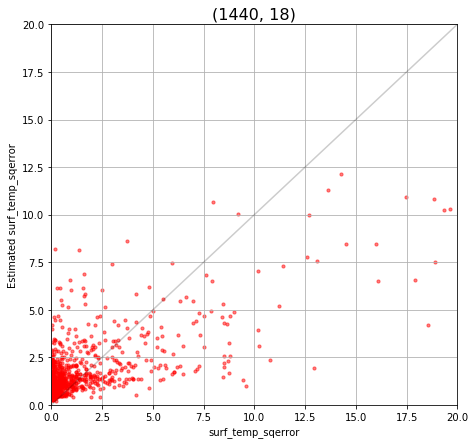

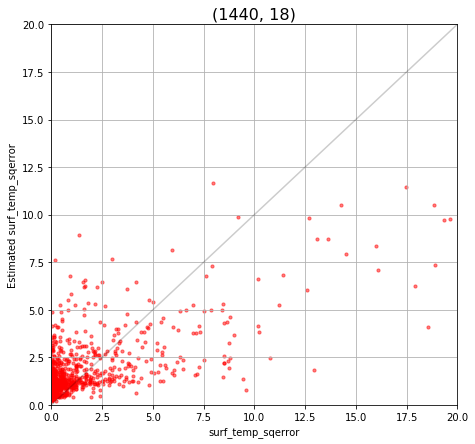

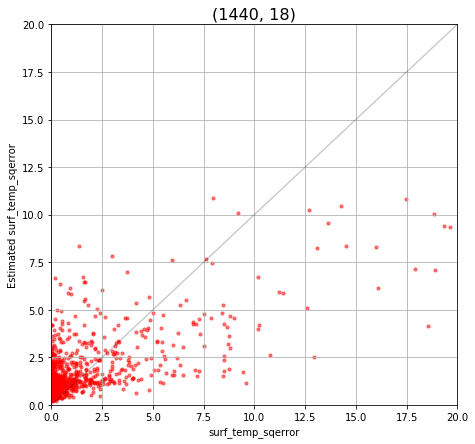

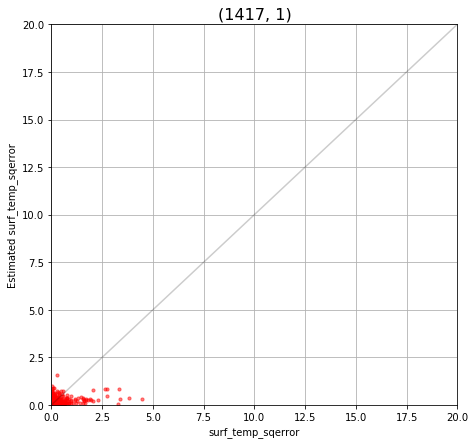

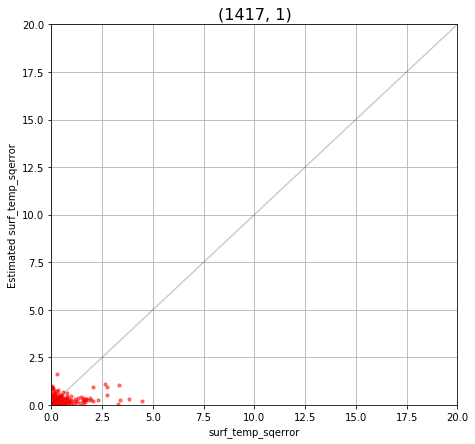

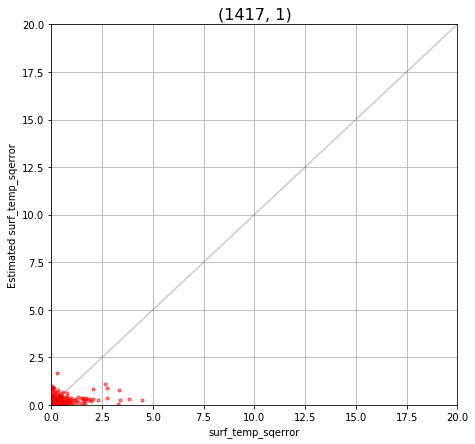

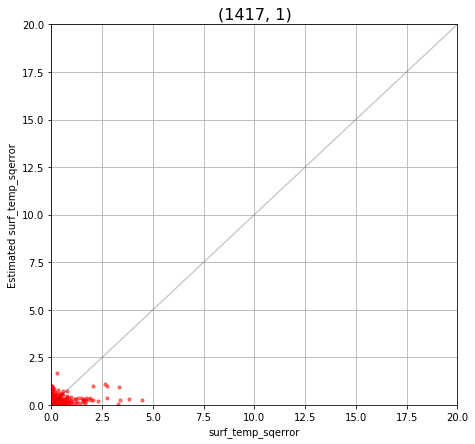

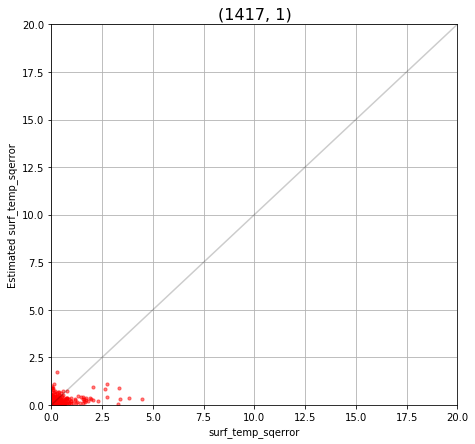

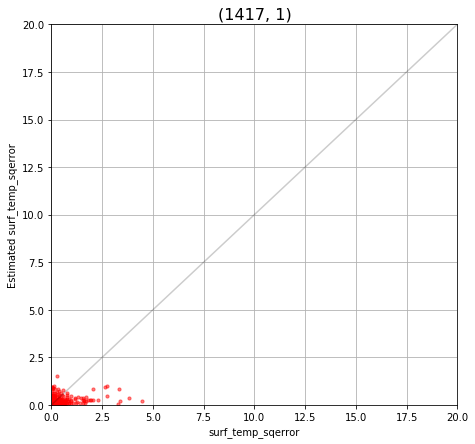

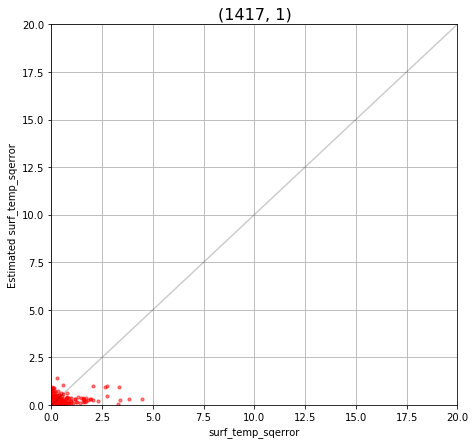

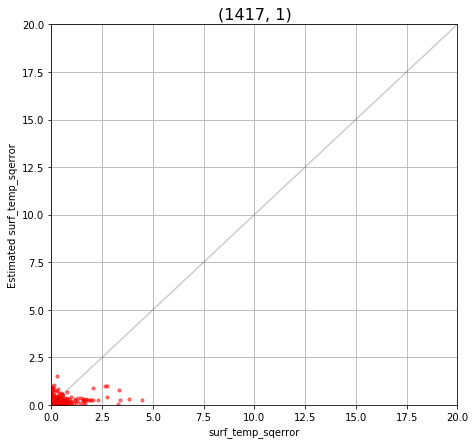

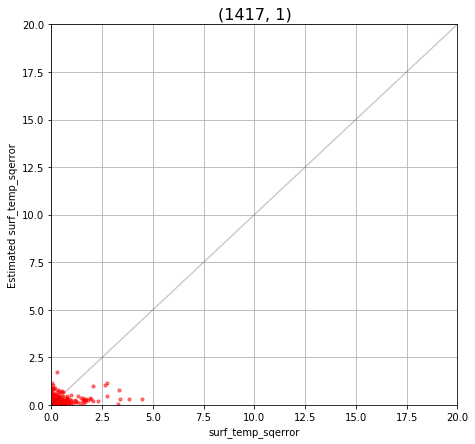

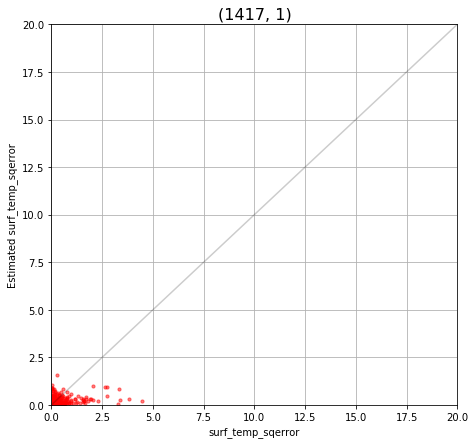

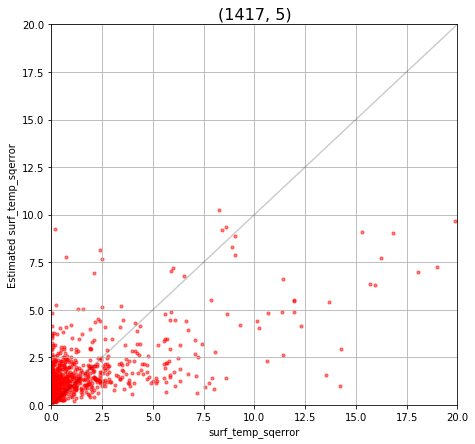

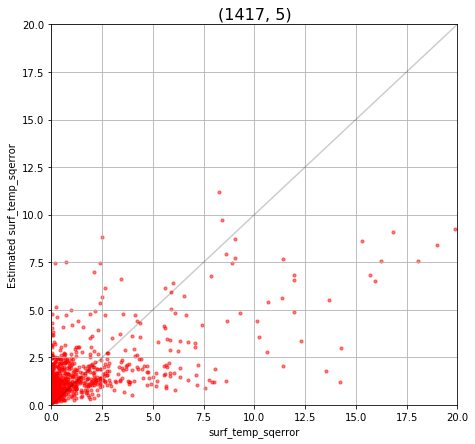

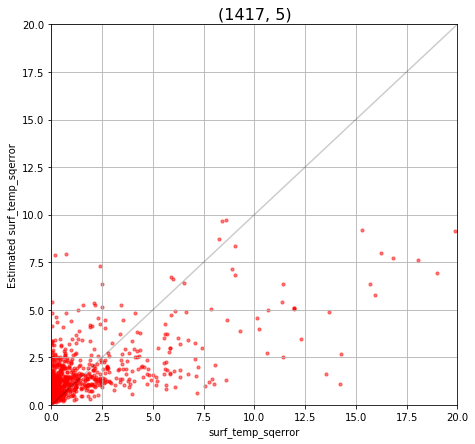

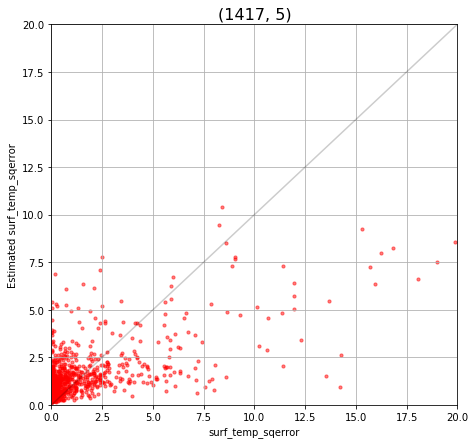

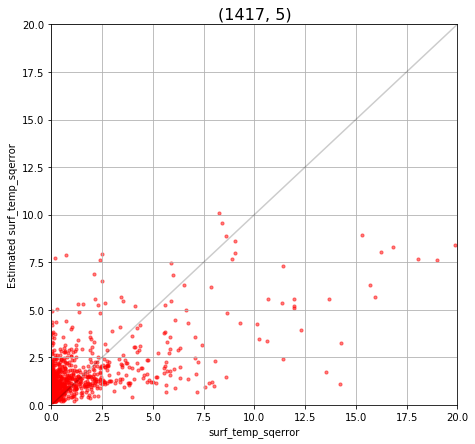

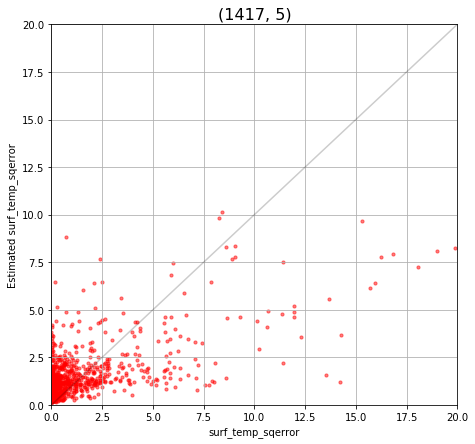

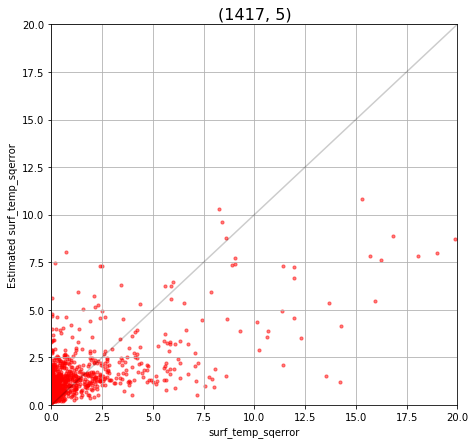

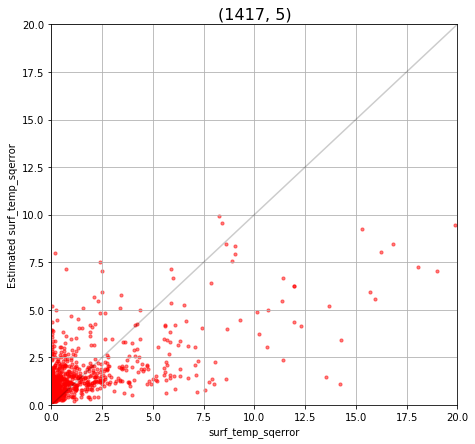

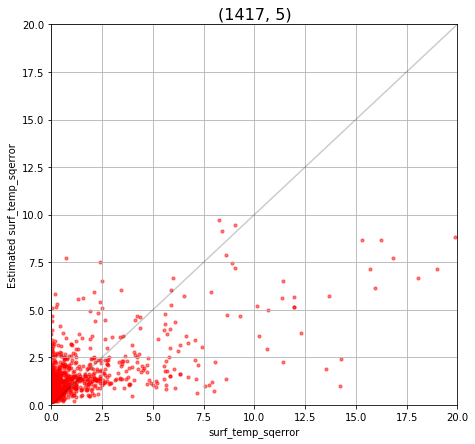

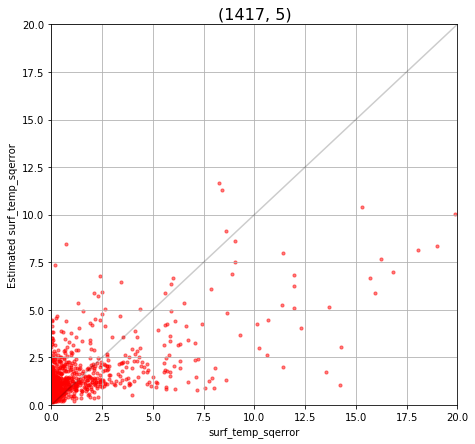

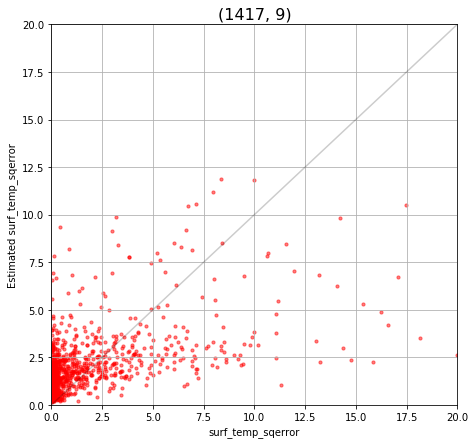

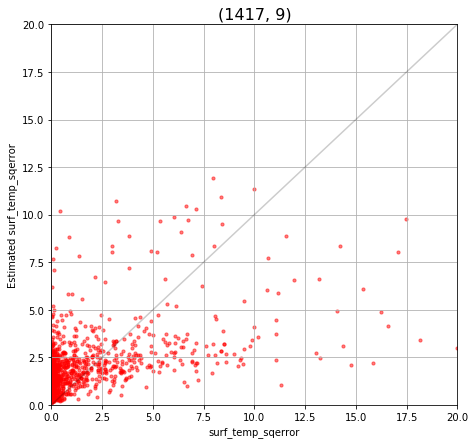

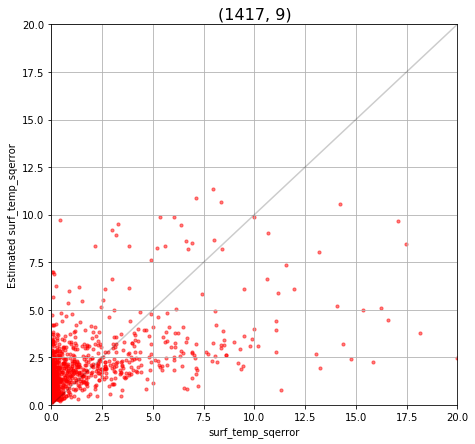

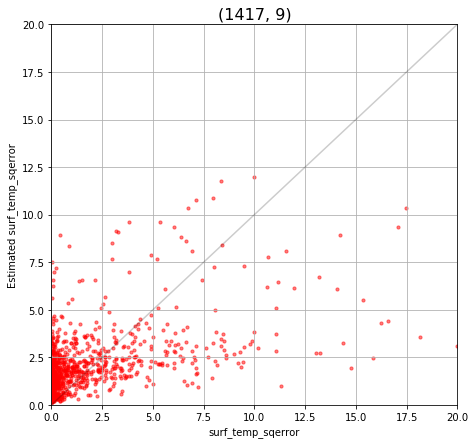

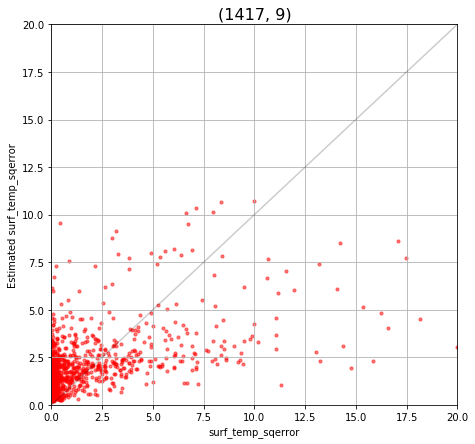

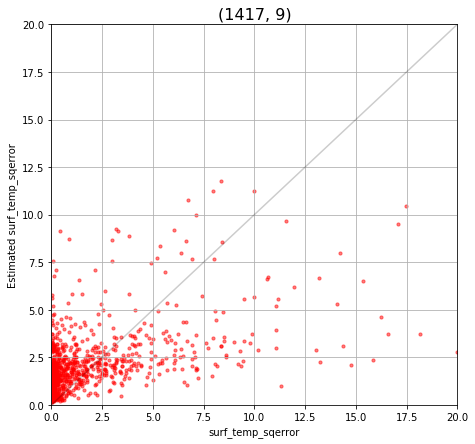

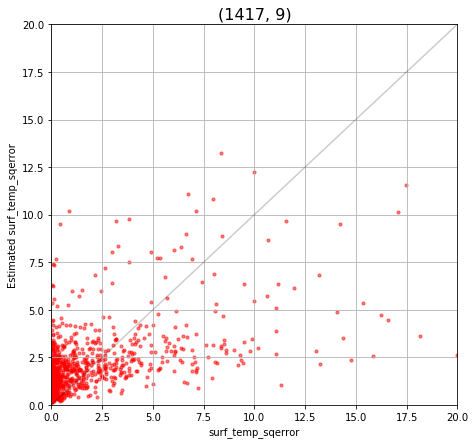

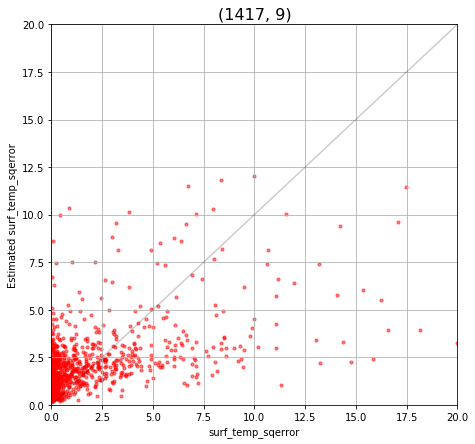

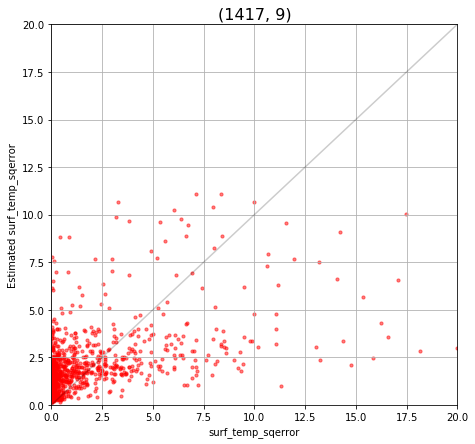

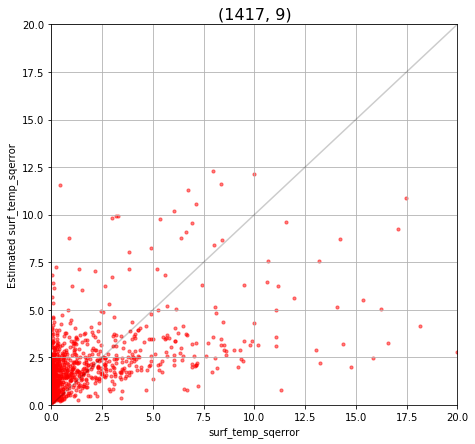

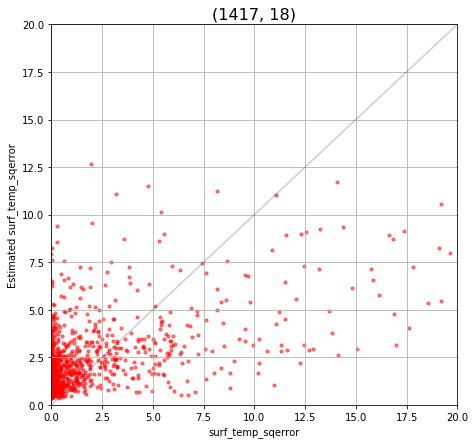

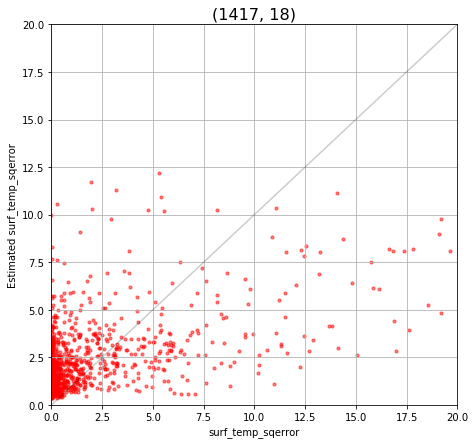

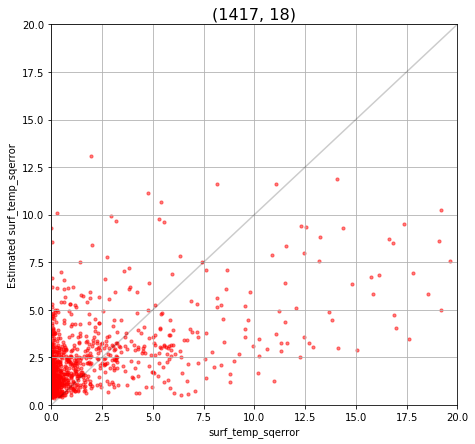

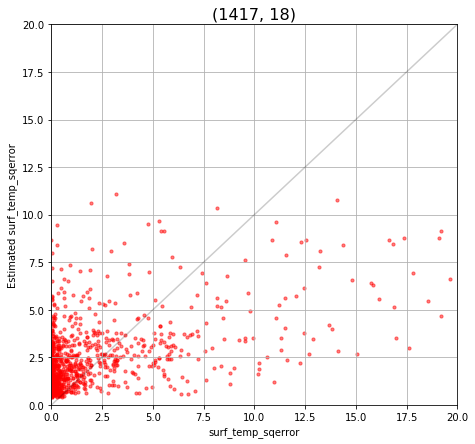

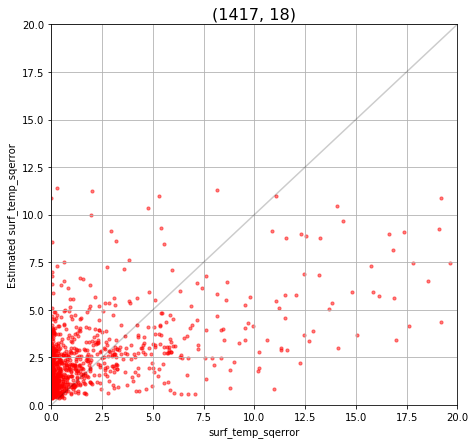

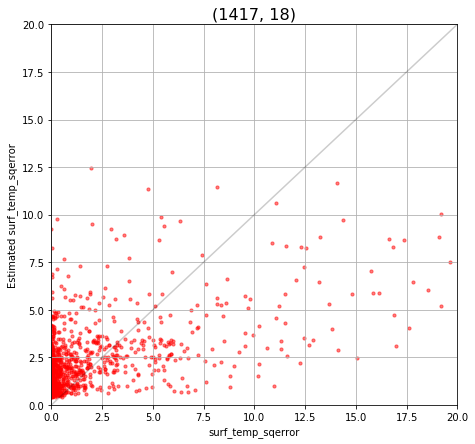

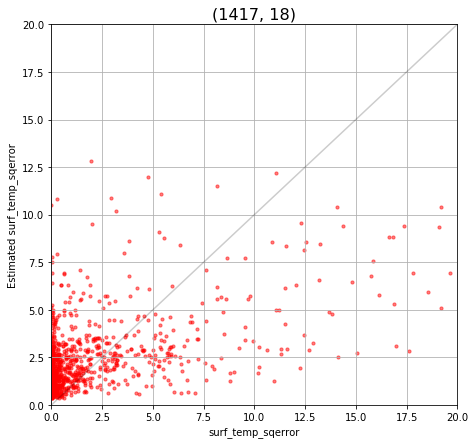

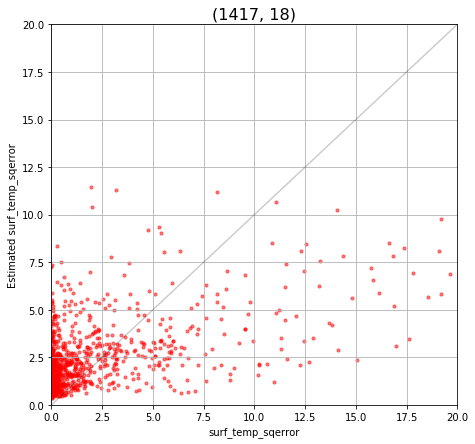

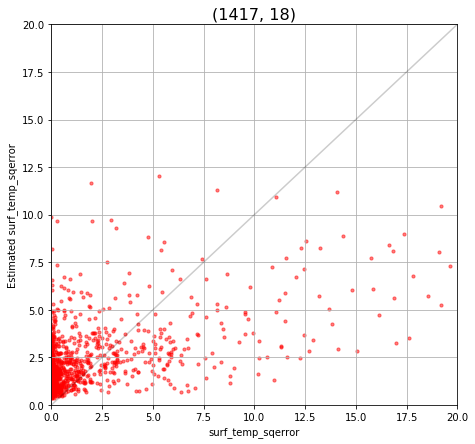

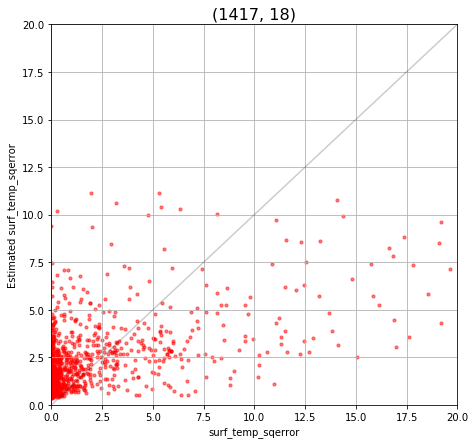

In [8]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

repeats = 10
features = 1
results = dict()

def allowed_key(key):
    if  1 in key or 5 in key or 9 in key or 18 in key:
            return True
    return False

for key in df.keys():
    if allowed_key(key):
        results[key] = experiment(repeats, df[key], key)
    

In [9]:
import csv

def saver(dictex):
    for key, val in dictex.items():
        val = pd.DataFrame(val)
        val.to_csv("results/rfr/results_{}.csv".format(str(key)))

    with open("results/rfr/keys.txt", "w") as f: #saving keys to file
        f.write(str(list(dictex.keys())))
        
saver(results)